# 건강검진 데이터 분석
###  음주여부에 따른 건강검진 수치 차이
### 신장,허리둘레의 크기와 체중의 상관관계

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.rc('axes', unicode_minus = False)

In [3]:
%config InlineBackend.figure_format = 'retina'

# 데이터 로드
공공데이터 포털에서 csv파일을 받는다.

In [4]:
df = pd.read_csv("NHIS_OPEN_GJ_2017.csv", encoding = "cp949")
df.shape

(1000000, 34)

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [6]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [7]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
892961,2017,892962,1,10,11,170,75,96.0,1.0,0.9,...,31.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

# 결측치 보기

In [9]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [10]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

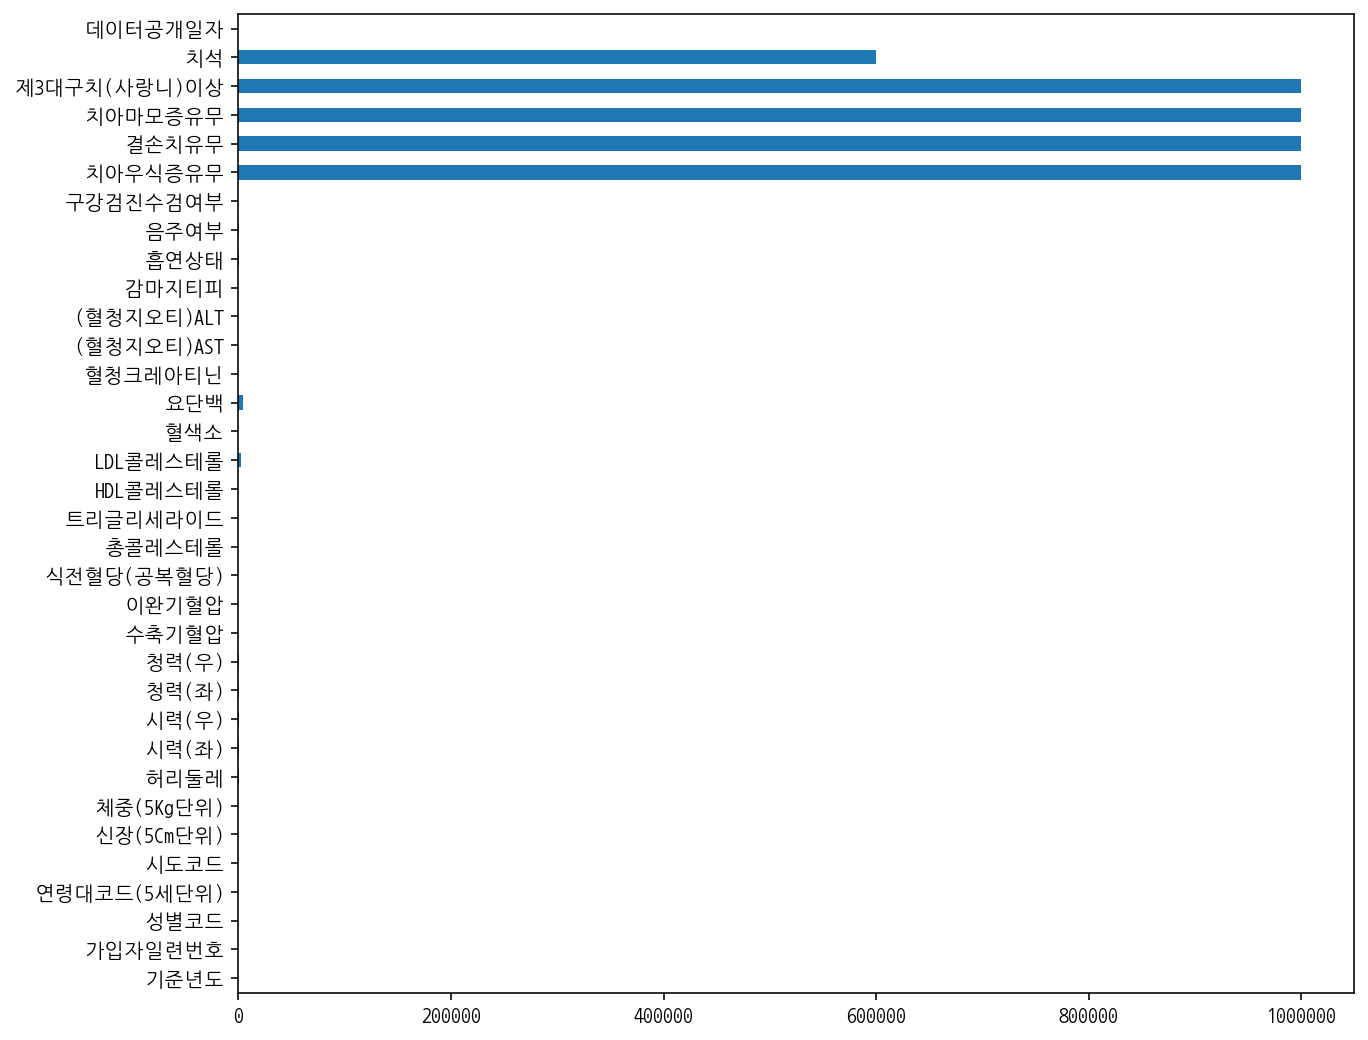

In [11]:
df.isnull().sum().plot.barh(figsize = (10,9))

# 일부 데이터 요약하기

In [12]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [13]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


# value_counts로 값 집계하기

In [14]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [15]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groupby 와 pivot_table 사용하기

In [16]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [17]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [18]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [19]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [20]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

In [21]:
df.pivot_table(index = "성별코드", values = "가입자일련번호", aggfunc = "count")

,가입자일련번호
성별코드,
1,530410
2,469590


In [22]:
pd.pivot_table(df, index = "음주여부", values = "감마지티피", aggfunc = ["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.819650,19.0
1.0,47.588675,30.0


In [23]:
pd.pivot_table(df, index = "음주여부", values = "감마지티피", aggfunc ="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
1.0,18.0,30.0,52.0,499005.0,999.0,47.588675,1.0,63.056912


In [24]:
pd.pivot_table(df, index = ["음주여부", "성별코드"], values = "감마지티피", aggfunc ="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     2     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
1.0  1     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
     2     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 데이터 시각화

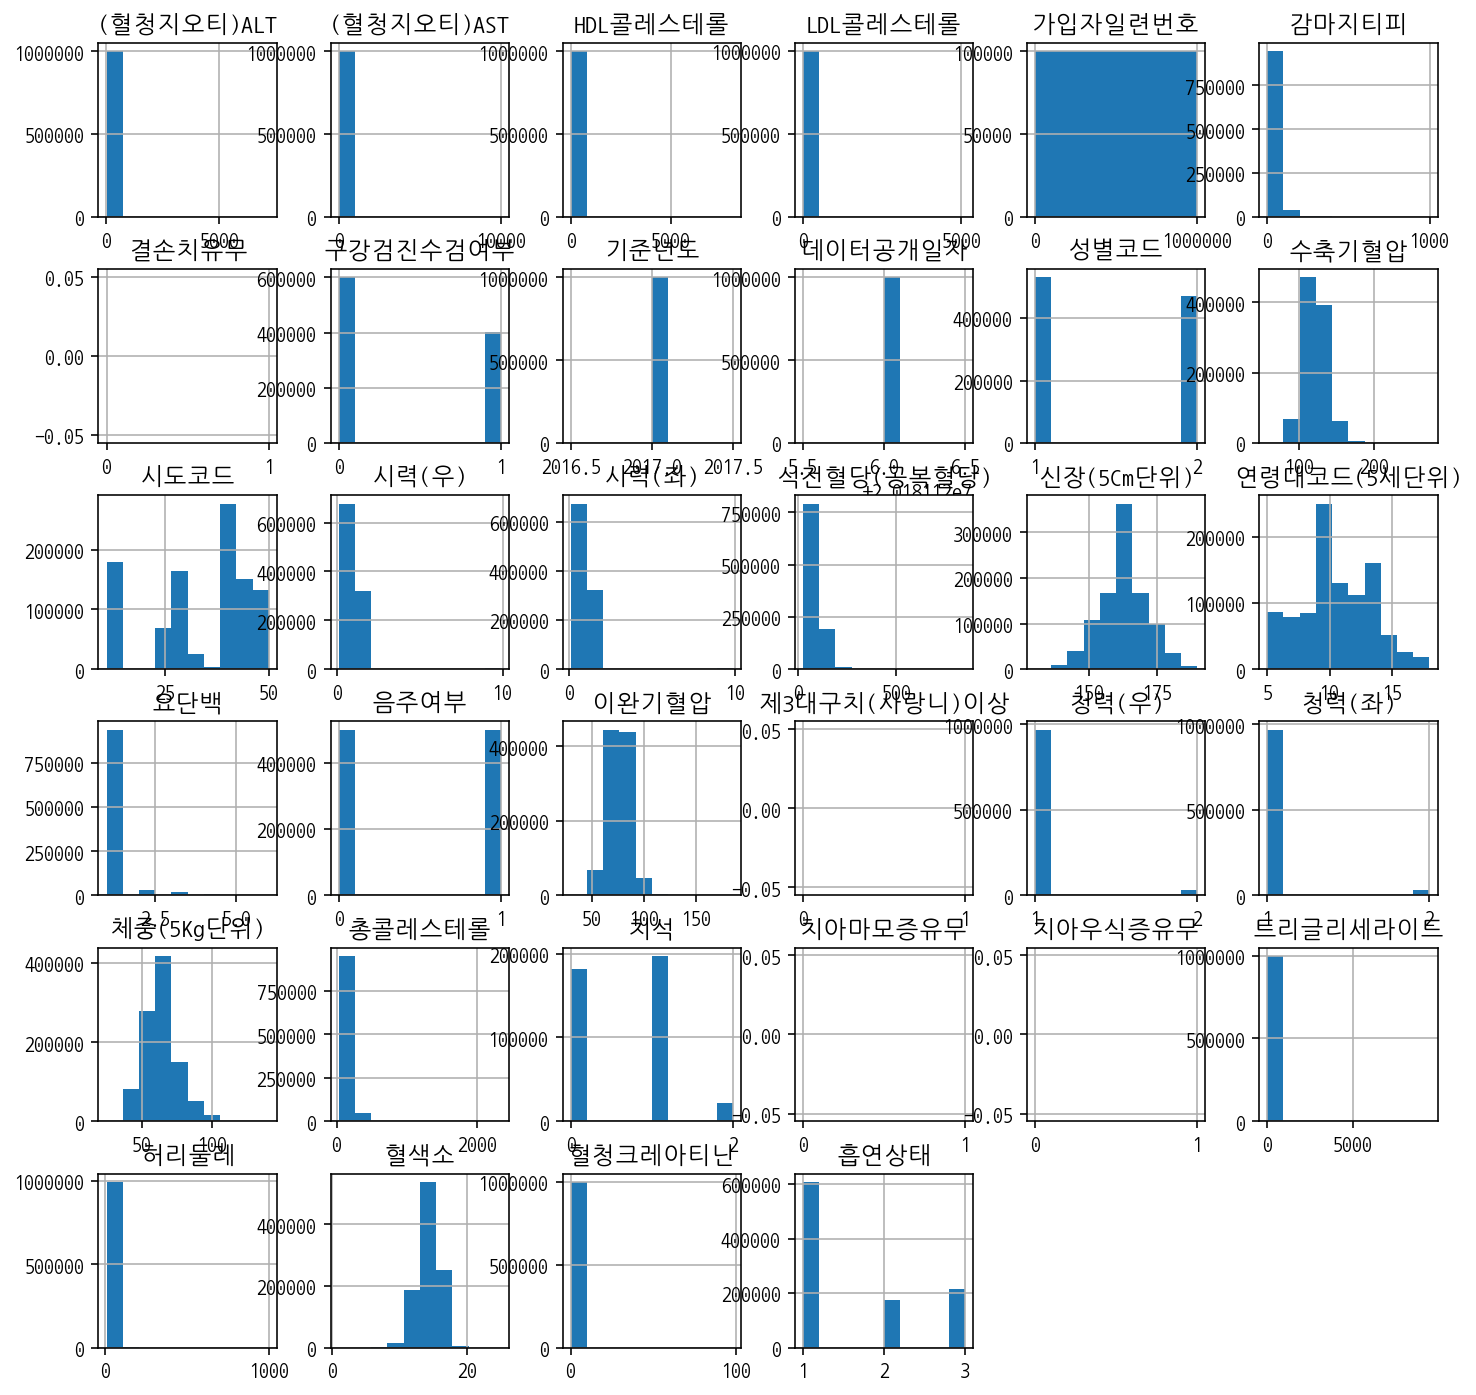

In [25]:
h = df.hist(figsize = (12,12))

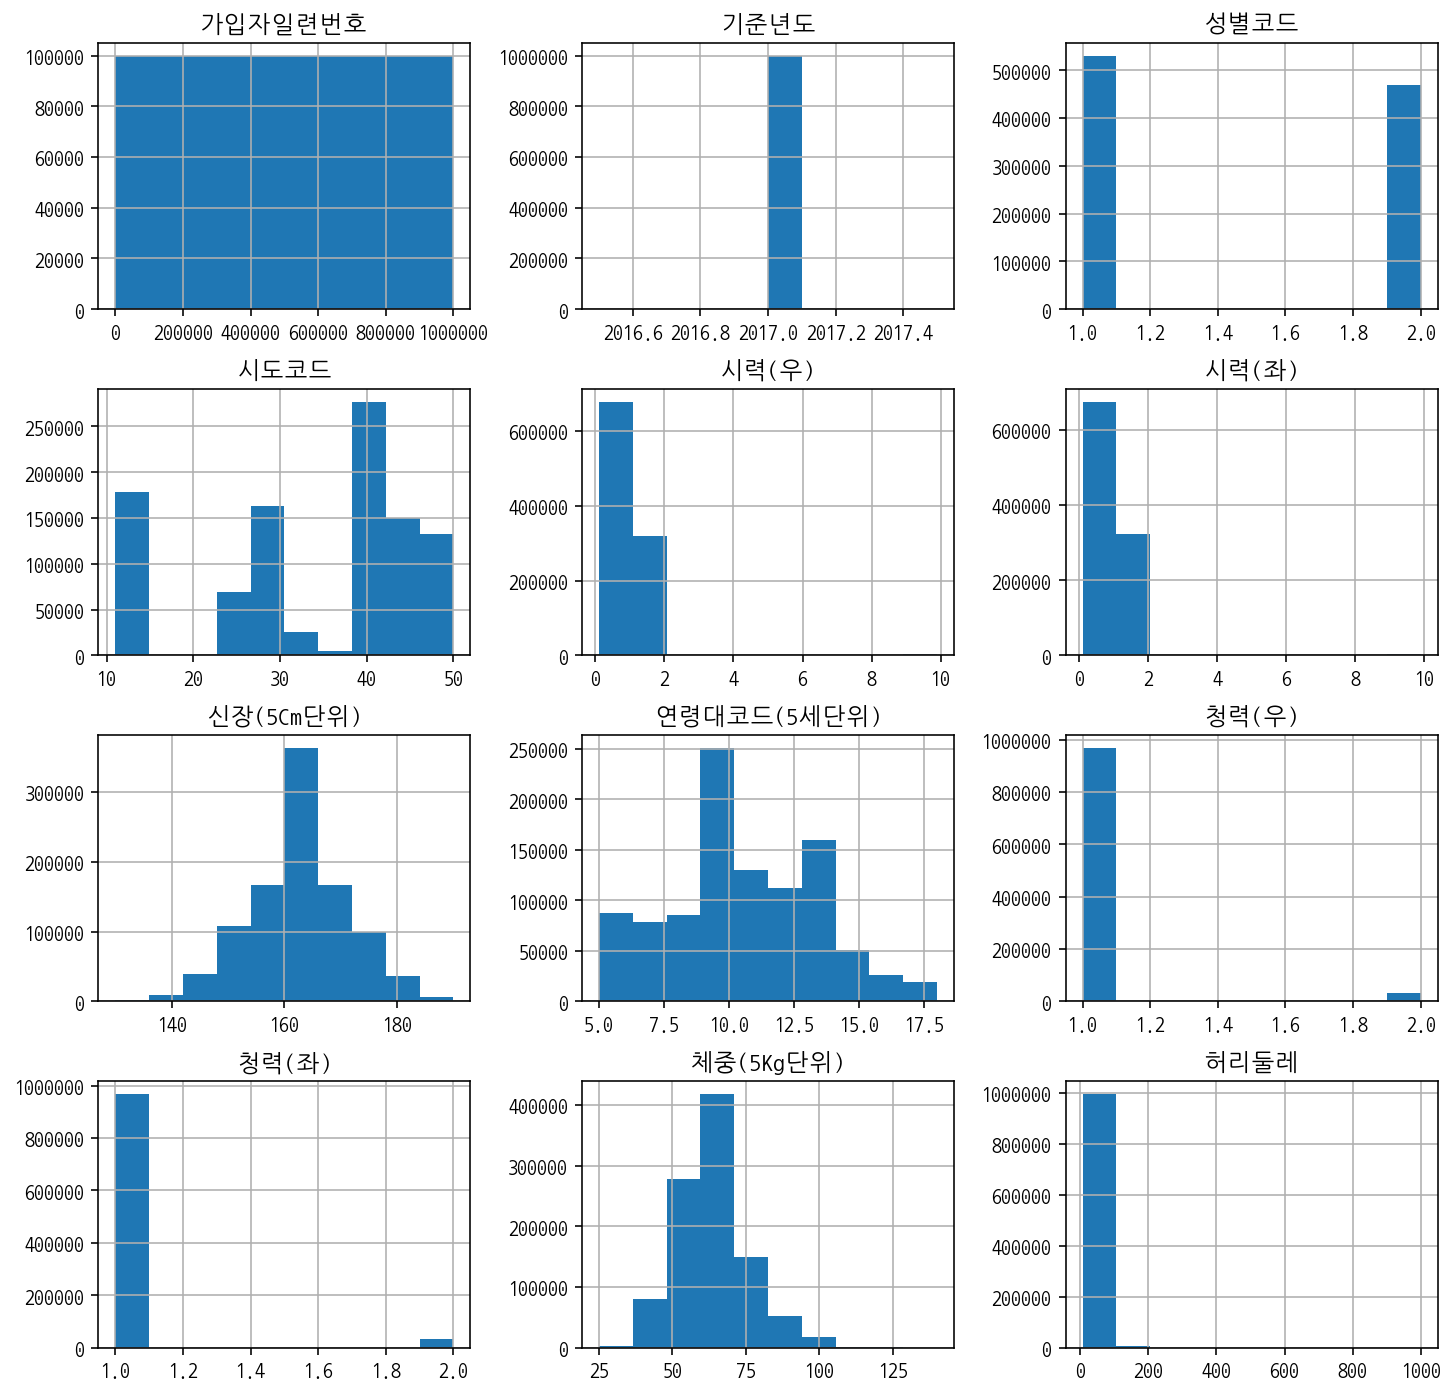

In [26]:
h = df.iloc[:,:12].hist(figsize = (12,12))

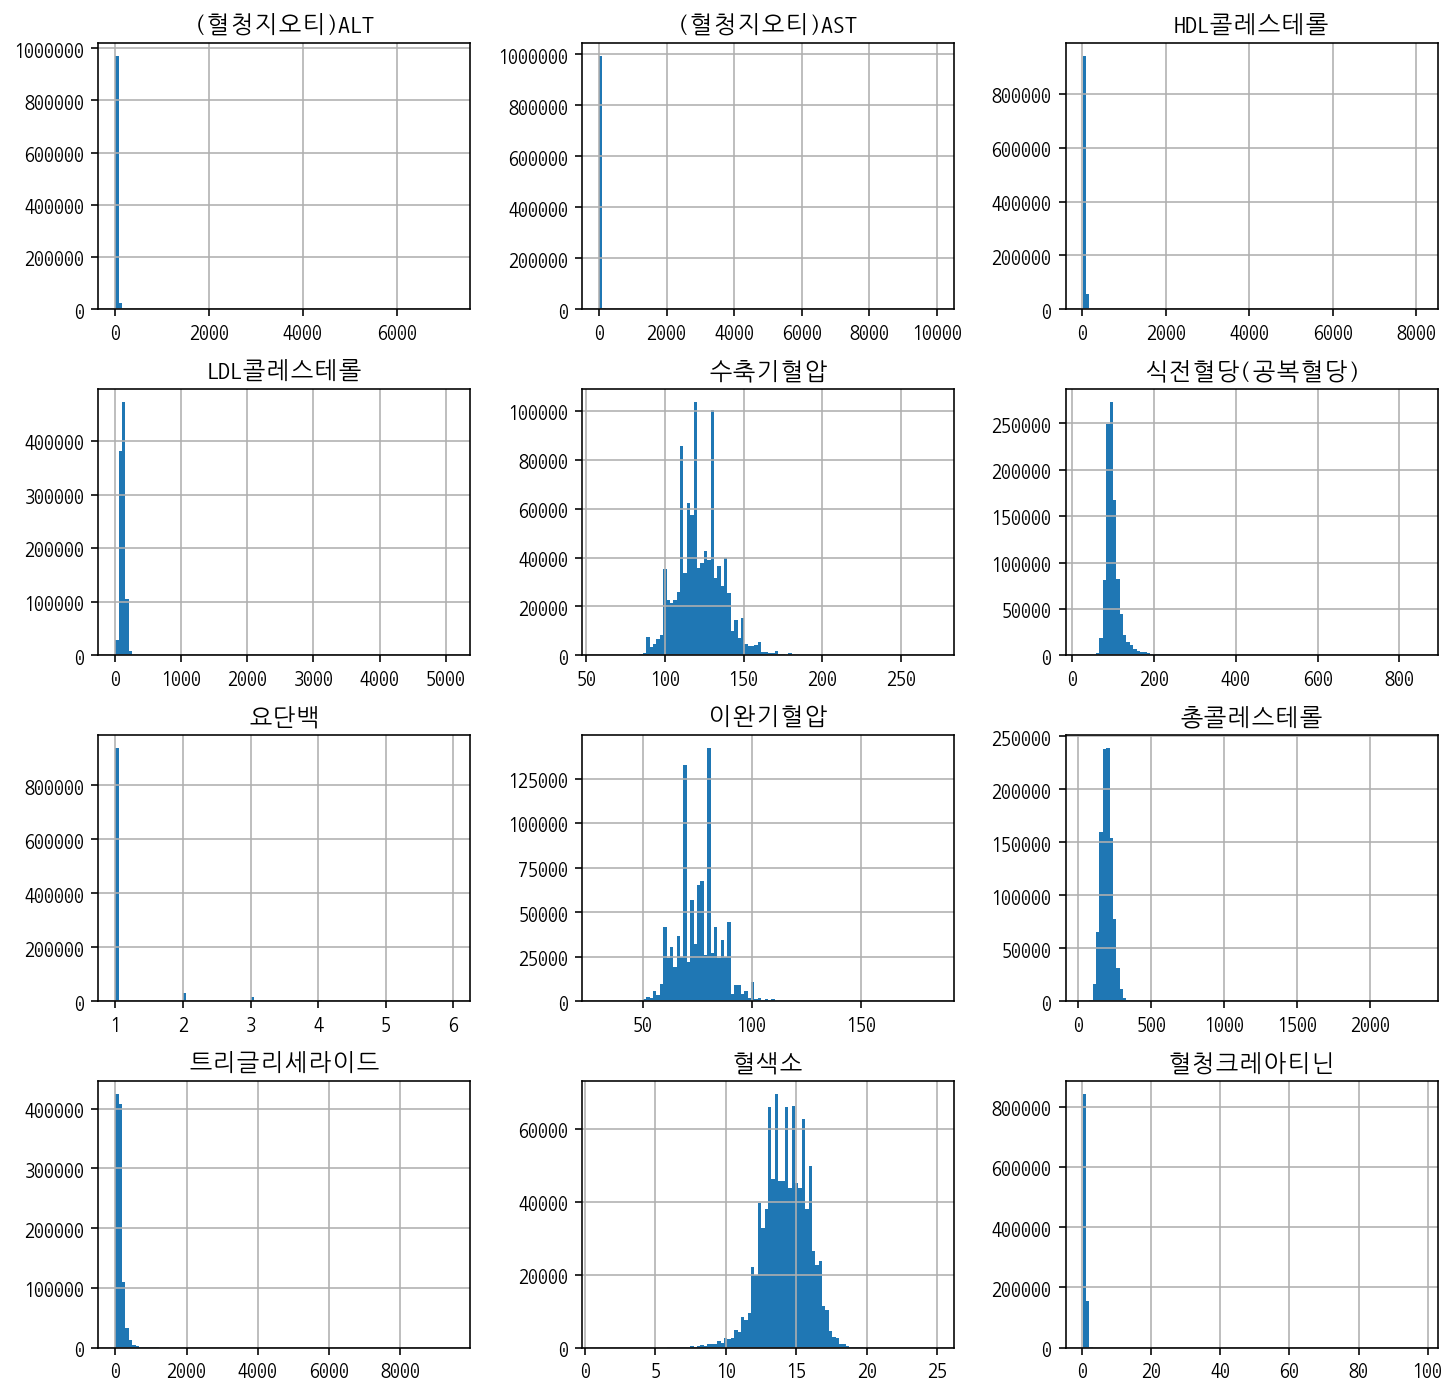

In [27]:
h = df.iloc[:, 12:24].hist(figsize = (12,12), bins = 100)

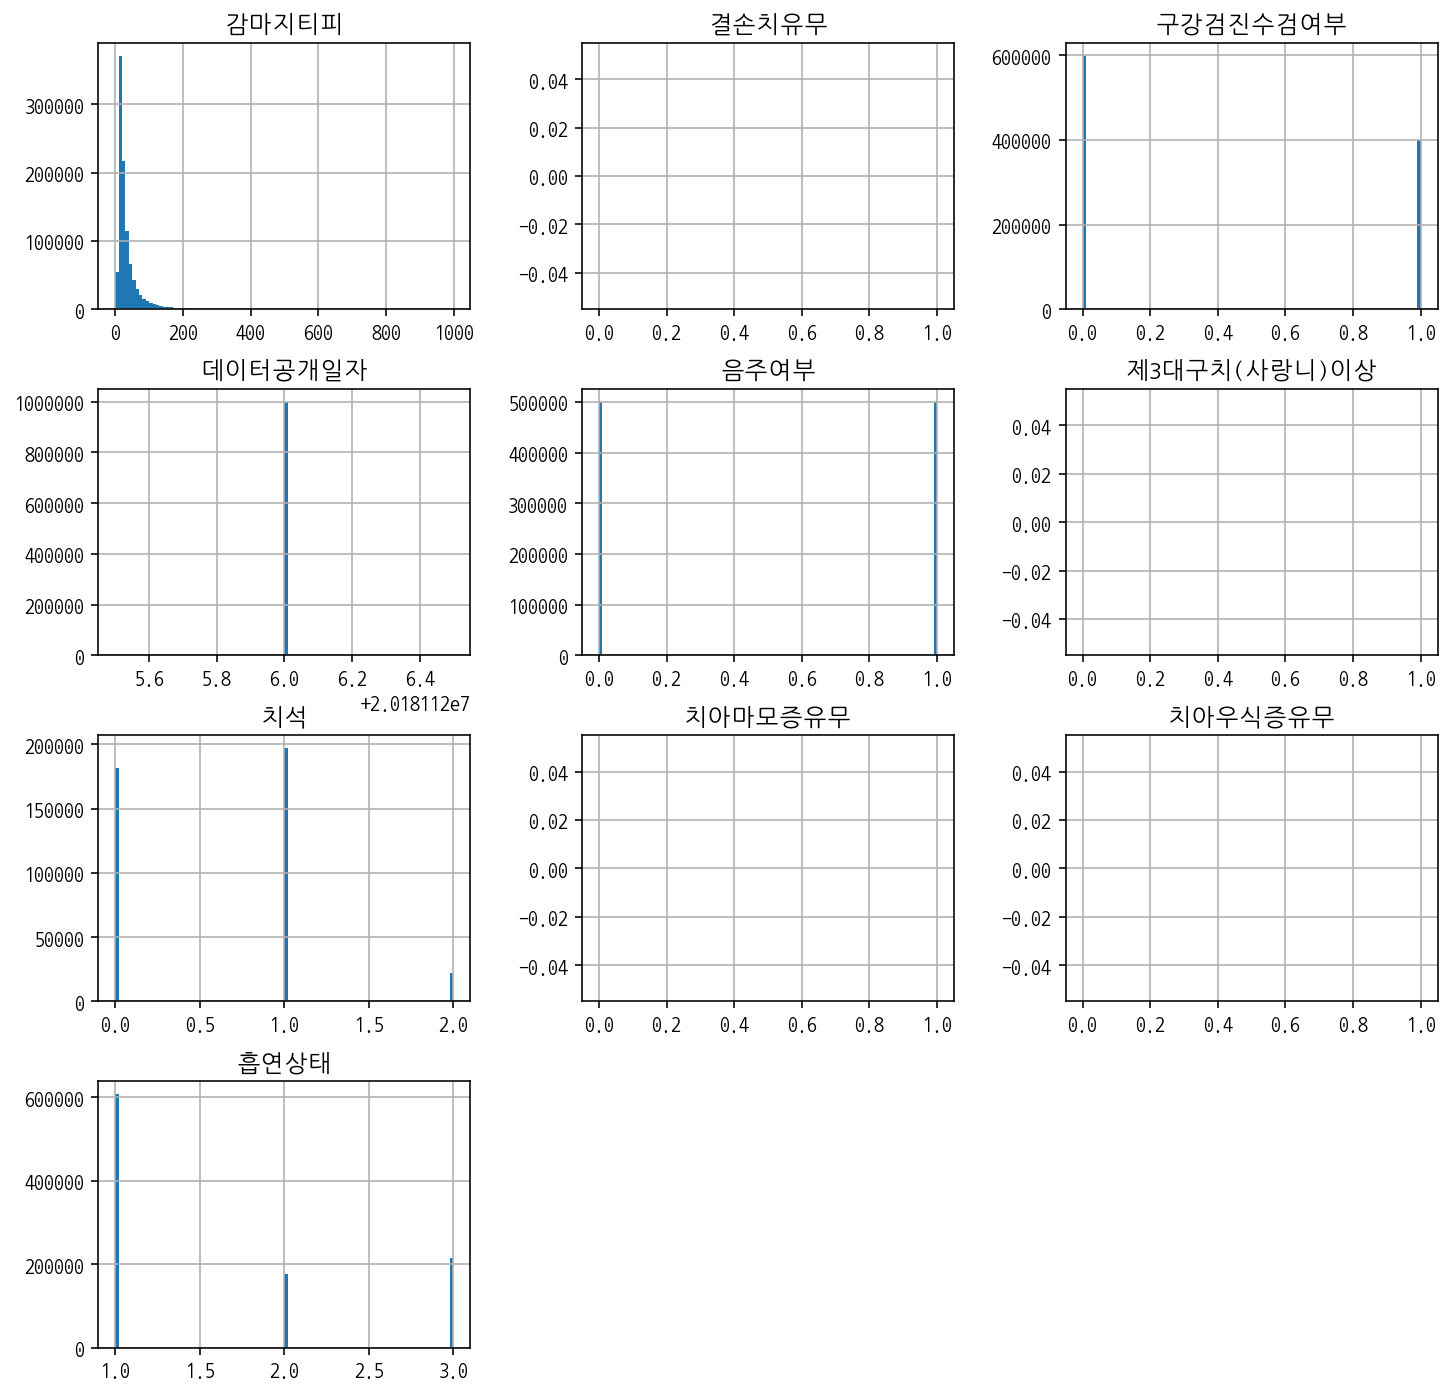

In [28]:
h = df.iloc[:, 24:].hist(figsize = (12,12), bins = 100)

# 샘플데이터 추출하기

In [29]:
df_sample = df.sample(1000, random_state = 1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 Seaborn 사용하기

# 범주형 카테고리 시각화

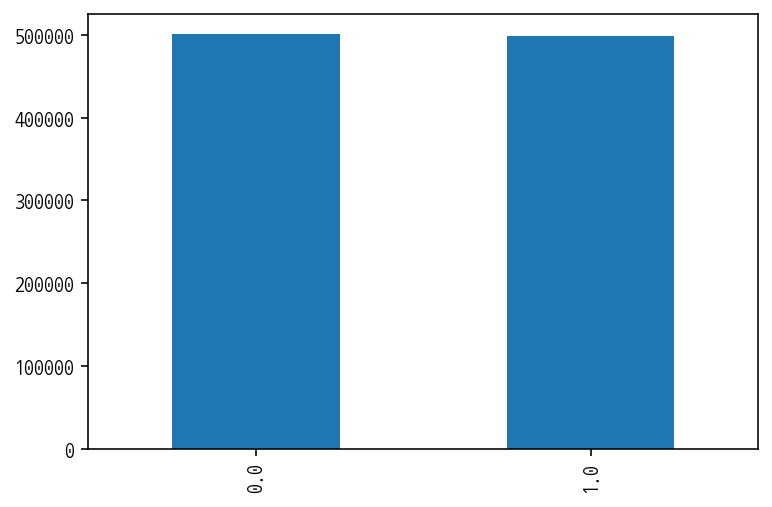

In [30]:
df["음주여부"].value_counts().plot.bar()

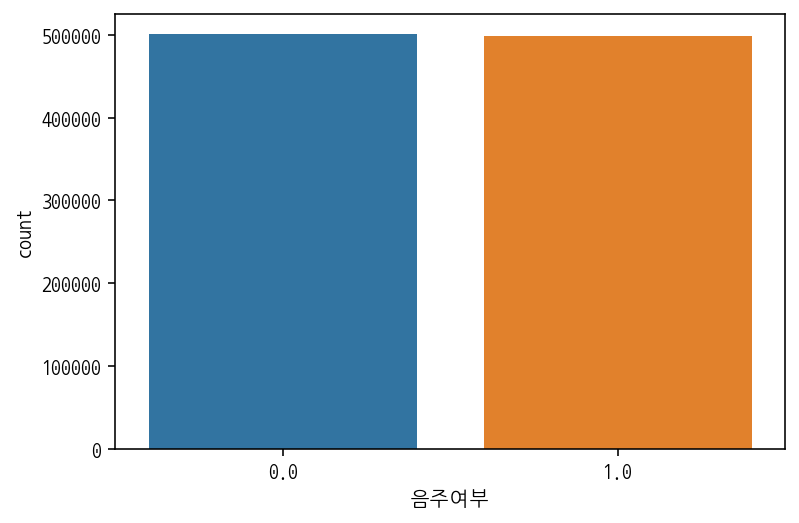

In [31]:
sns.countplot(x = "음주여부", data = df)

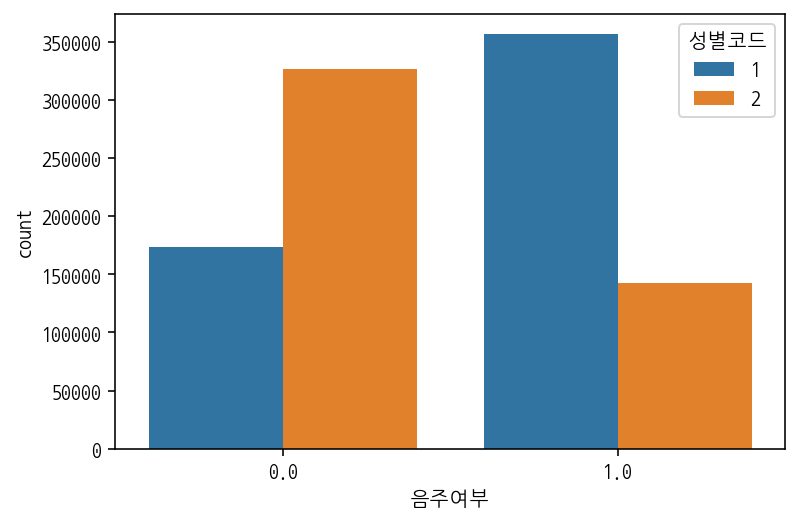

In [32]:
sns.countplot(data = df, x = "음주여부", hue = "성별코드")

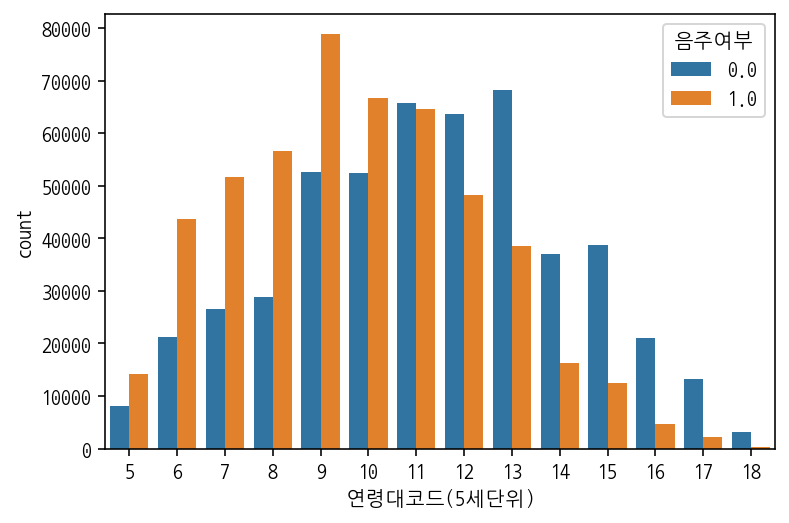

In [33]:
sns.countplot(data = df, x = "연령대코드(5세단위)", hue = "음주여부")

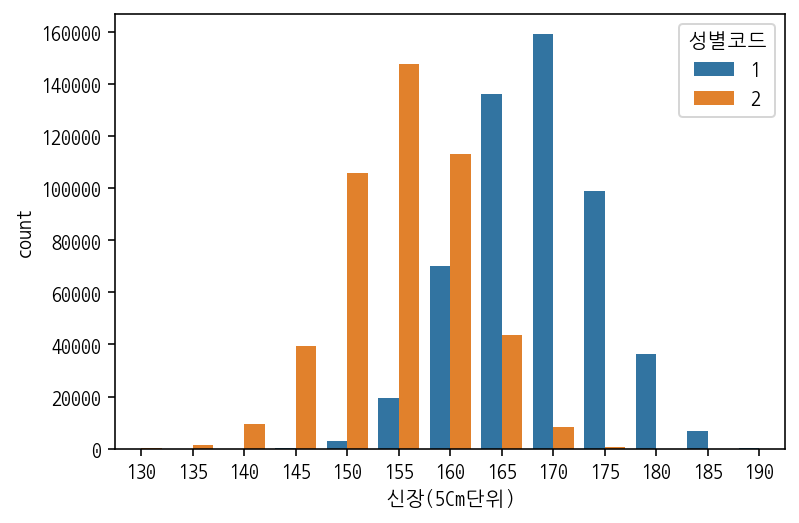

In [34]:
sns.countplot(data = df, x = "신장(5Cm단위)", hue = "성별코드")

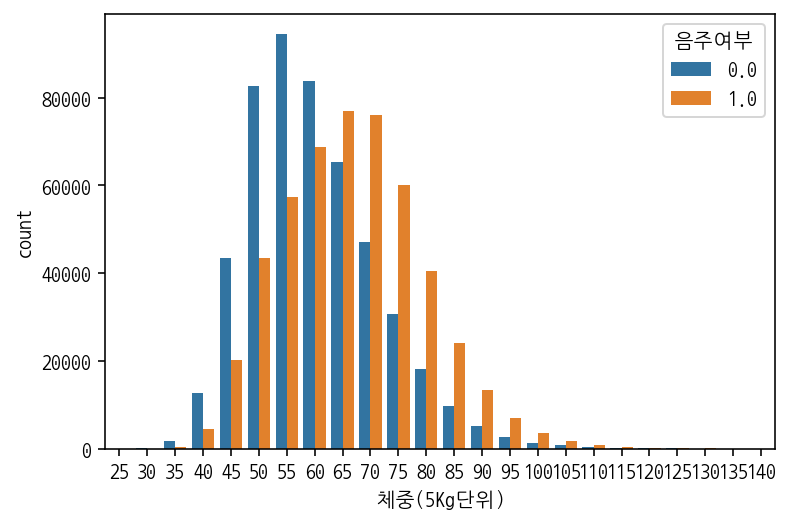

In [35]:
sns.countplot(data = df, x = "체중(5Kg단위)", hue = "음주여부")

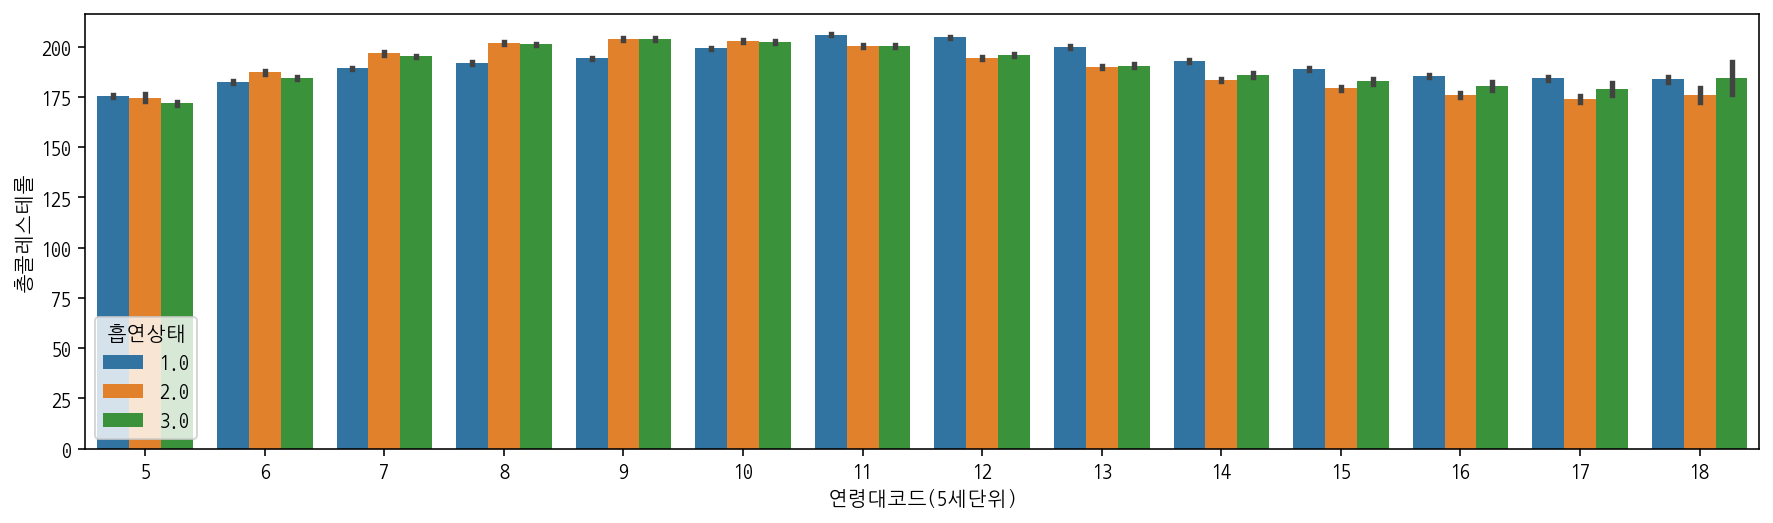

In [36]:
plt.figure(figsize = (15,4))
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "총콜레스테롤", hue = "흡연상태")

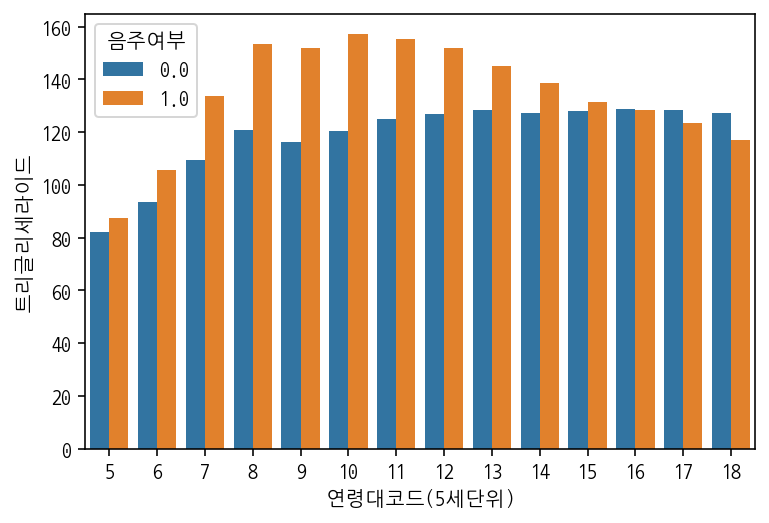

In [37]:
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "트리글리세라이드",hue = "음주여부", ci = None)

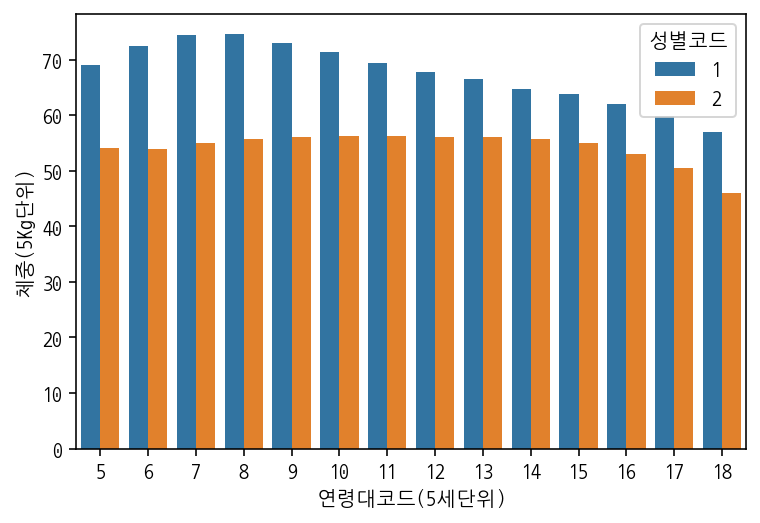

In [38]:
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "체중(5Kg단위)",hue = "성별코드", ci = None)

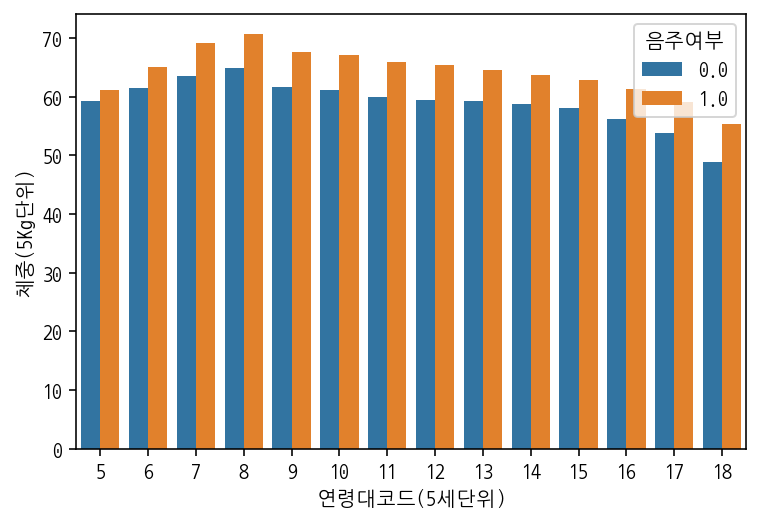

In [39]:
sns.barplot(data = df, x = "연령대코드(5세단위)", y = "체중(5Kg단위)",hue = "음주여부", ci = None)

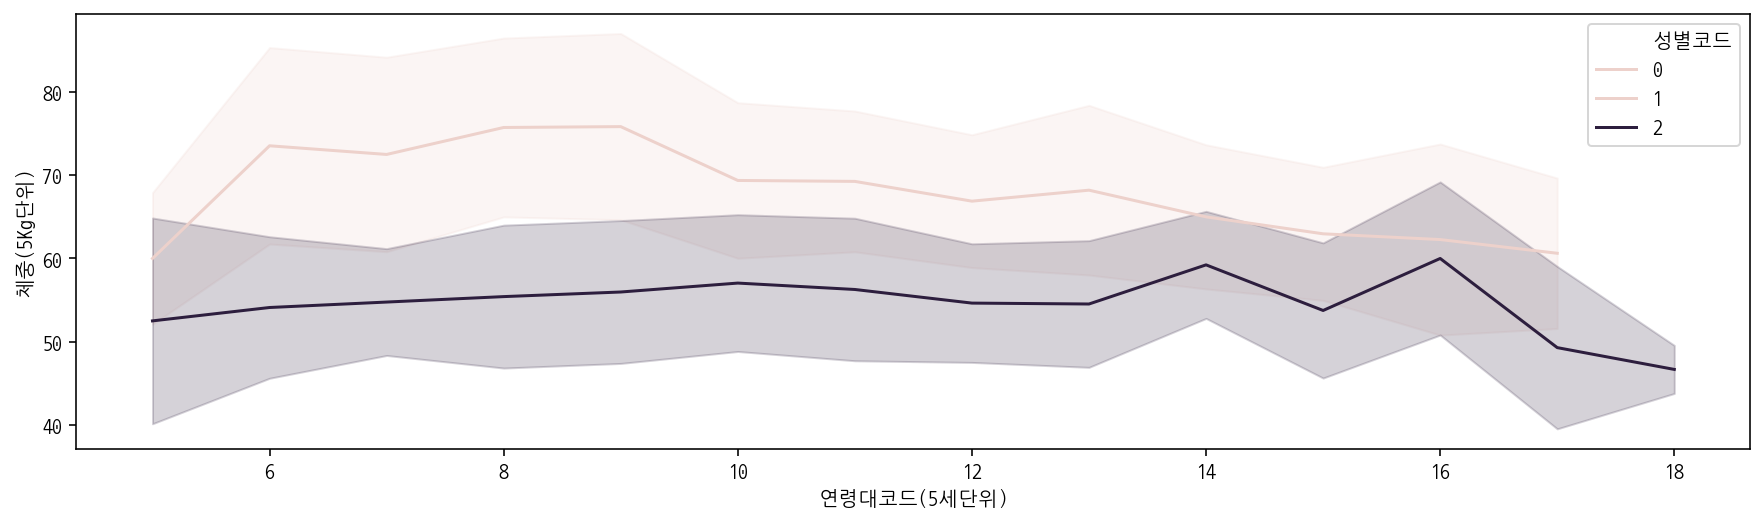

In [40]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_sample, x = "연령대코드(5세단위)", y = "체중(5Kg단위)",hue = "성별코드", ci = "sd")

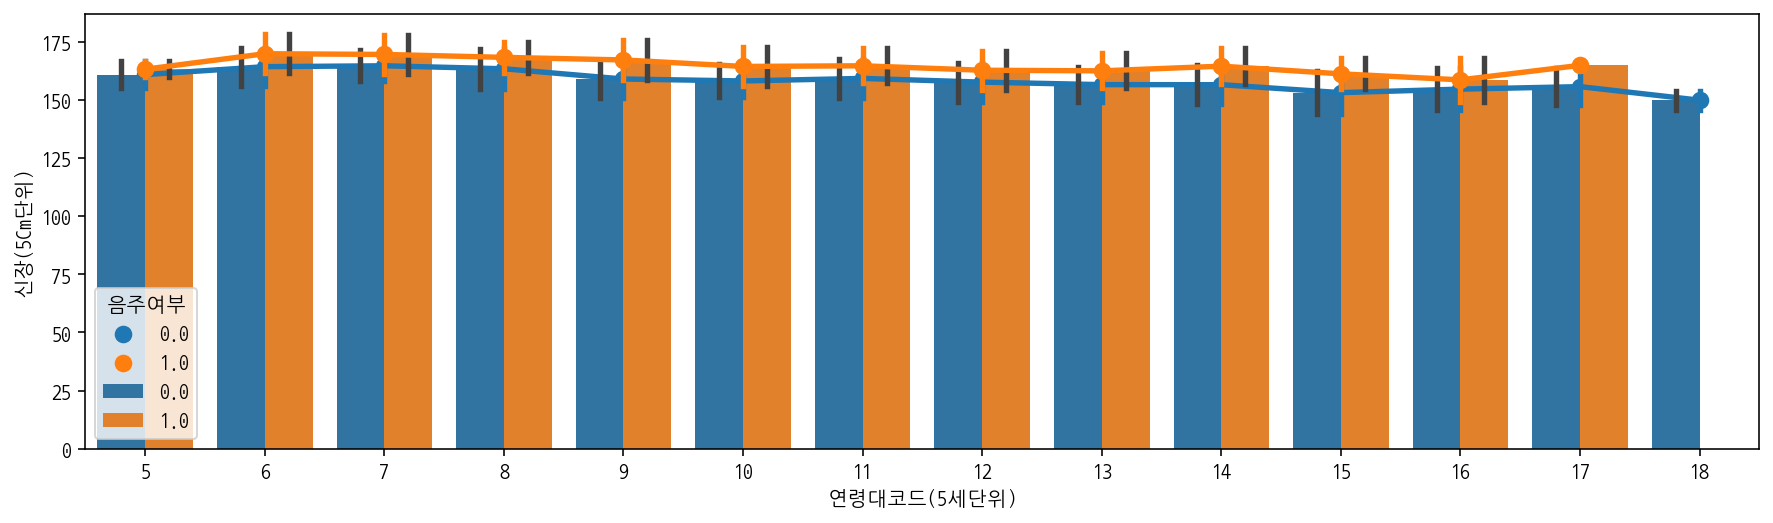

In [41]:
plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)",hue = "음주여부", ci = "sd")
sns.pointplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)",hue = "음주여부", ci = "sd")

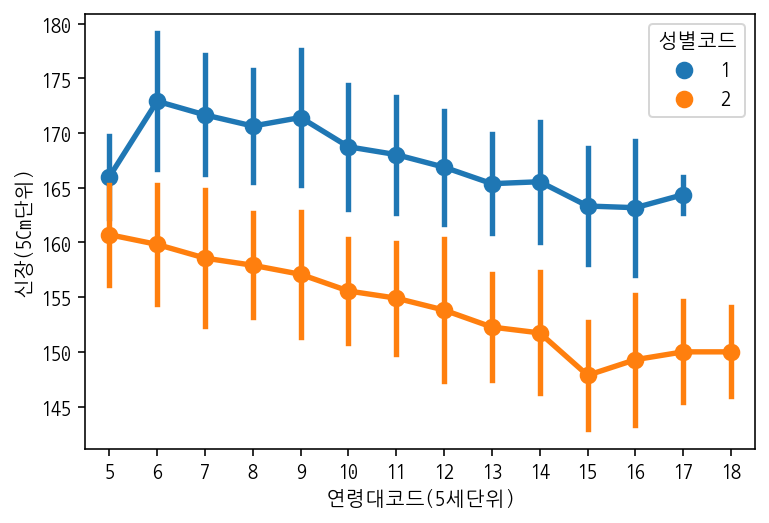

In [42]:
sns.pointplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)",hue = "성별코드", ci = "sd")

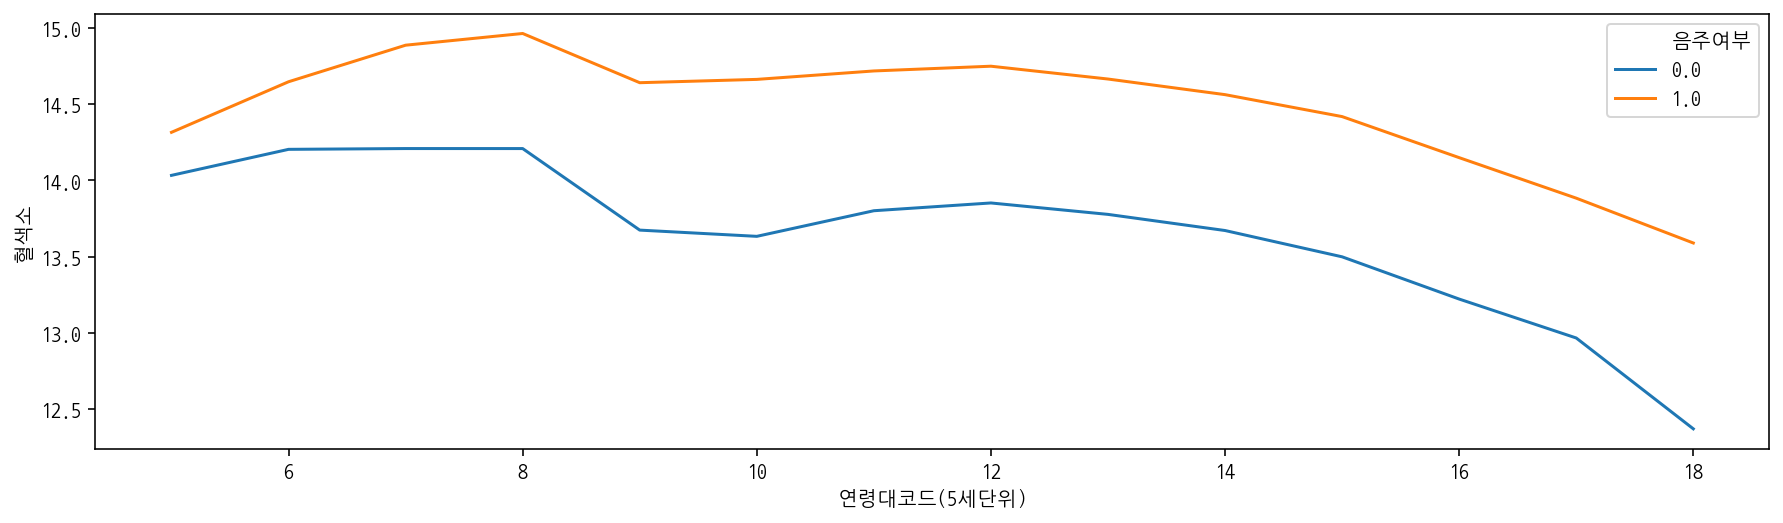

In [43]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", ci = None)

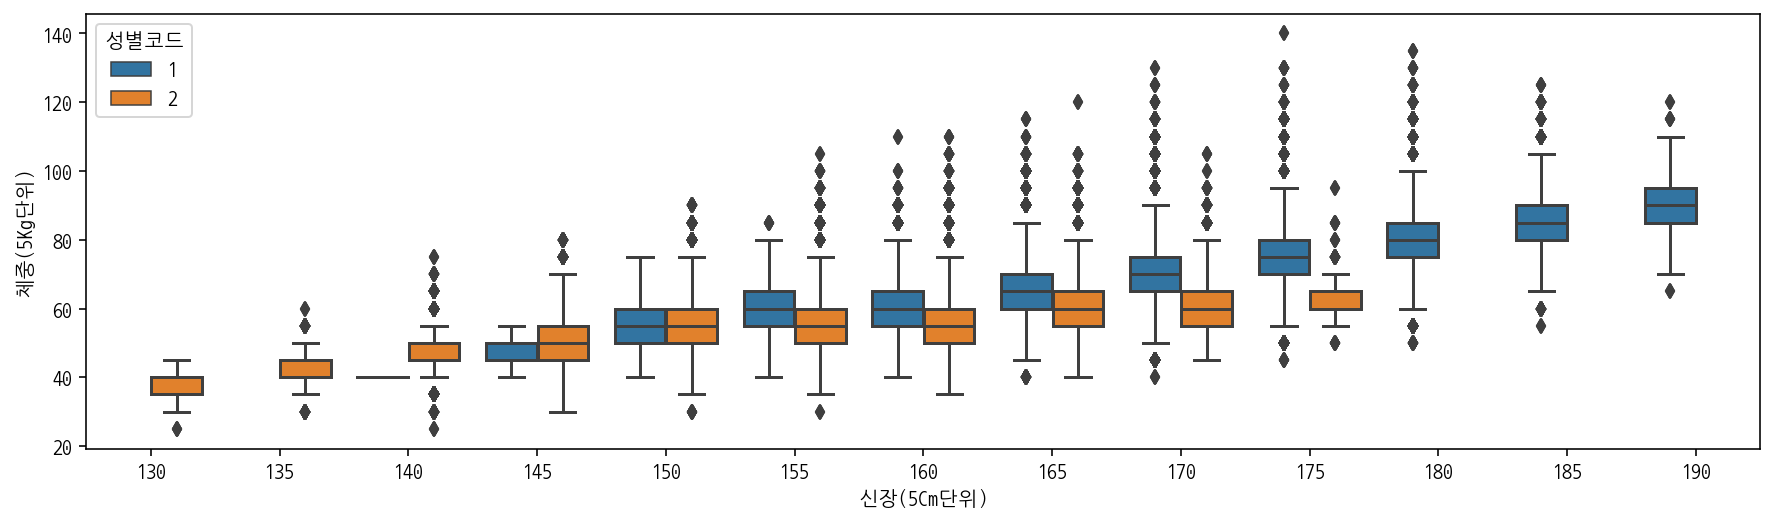

In [44]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "성별코드")

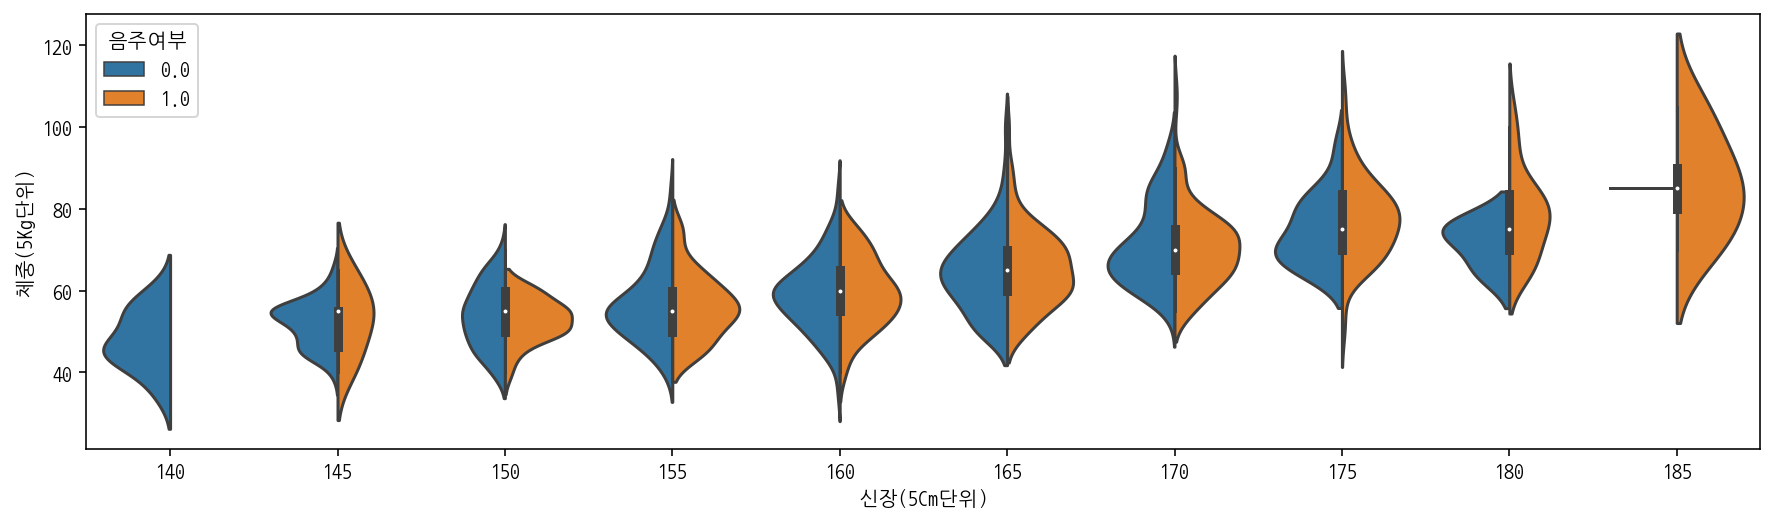

In [45]:
plt.figure(figsize = (15,4))
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부", split = True)

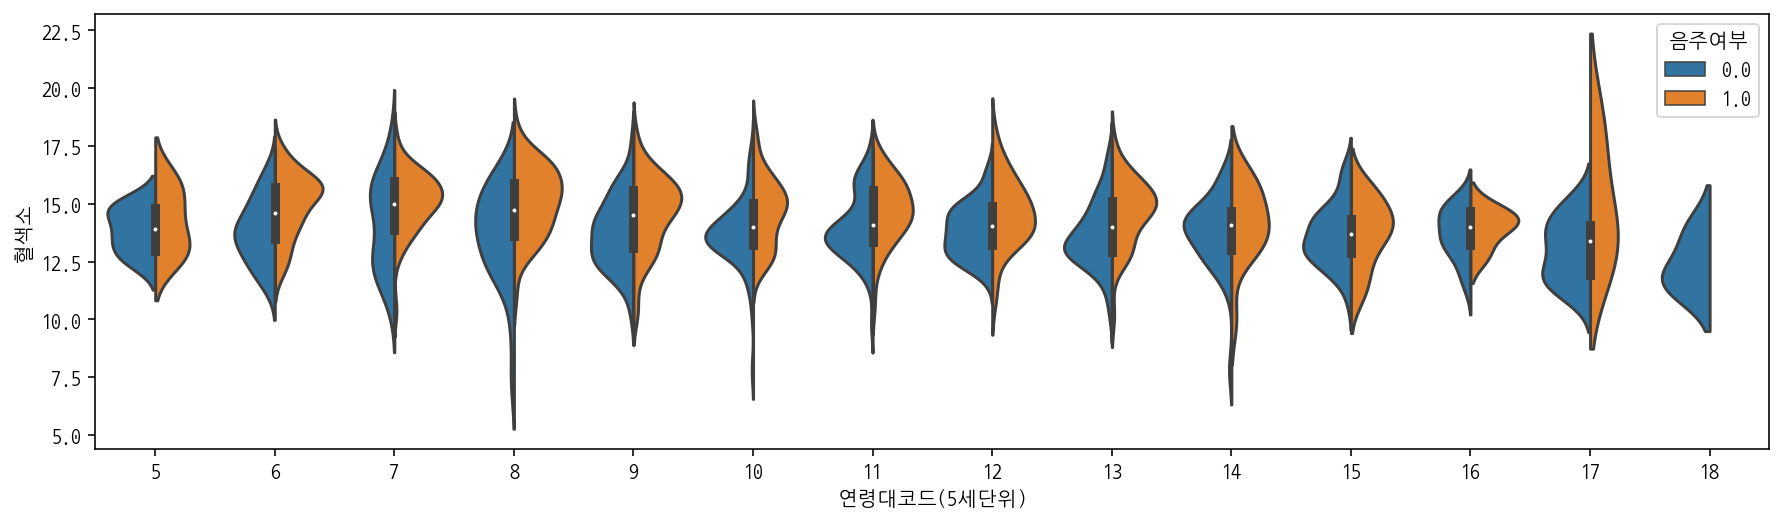

In [46]:
plt.figure(figsize = (15,4))
sns.violinplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", split = True)

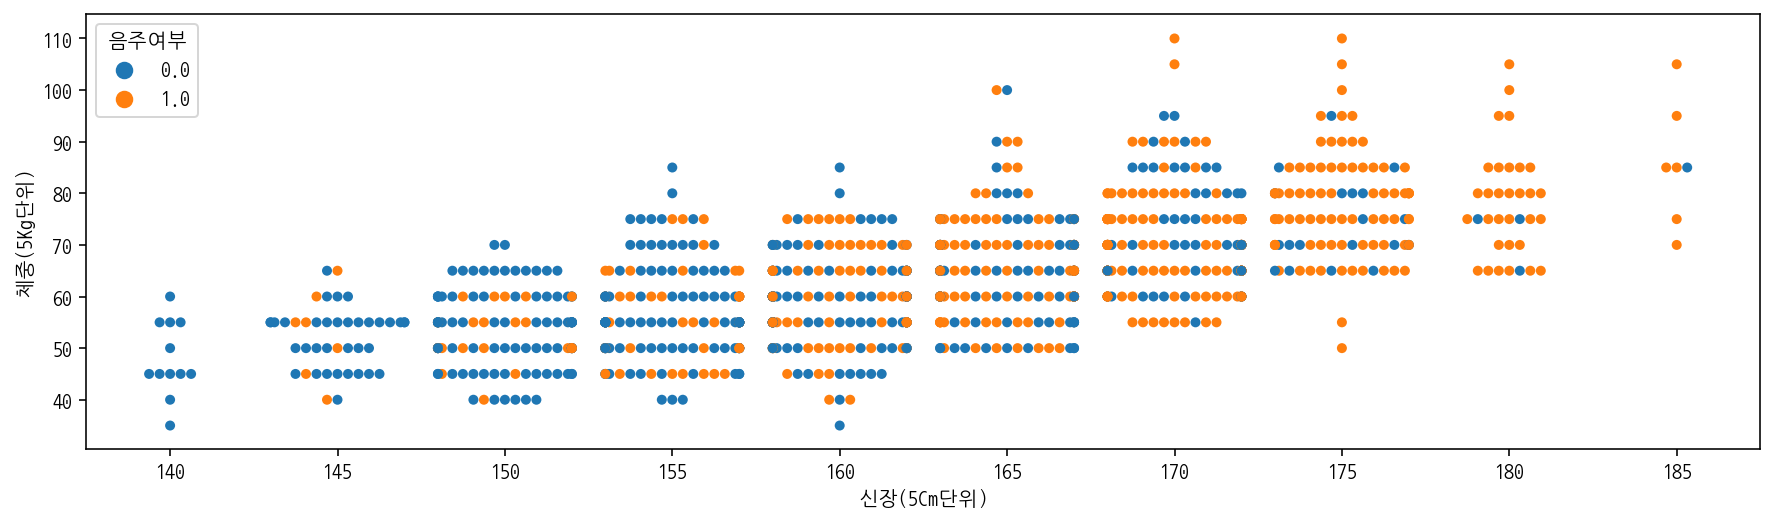

In [47]:
plt.figure(figsize = (15,4))
sns.swarmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부")

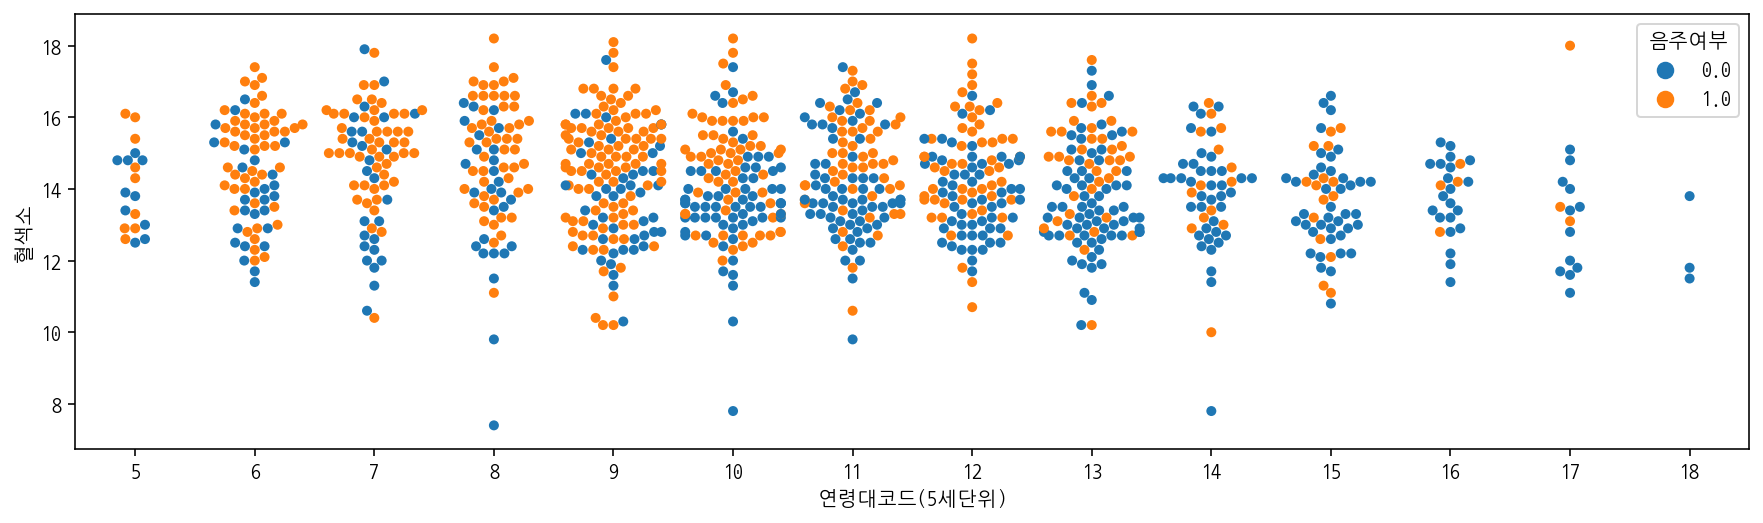

In [48]:
plt.figure(figsize = (15,4))
sns.swarmplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부")

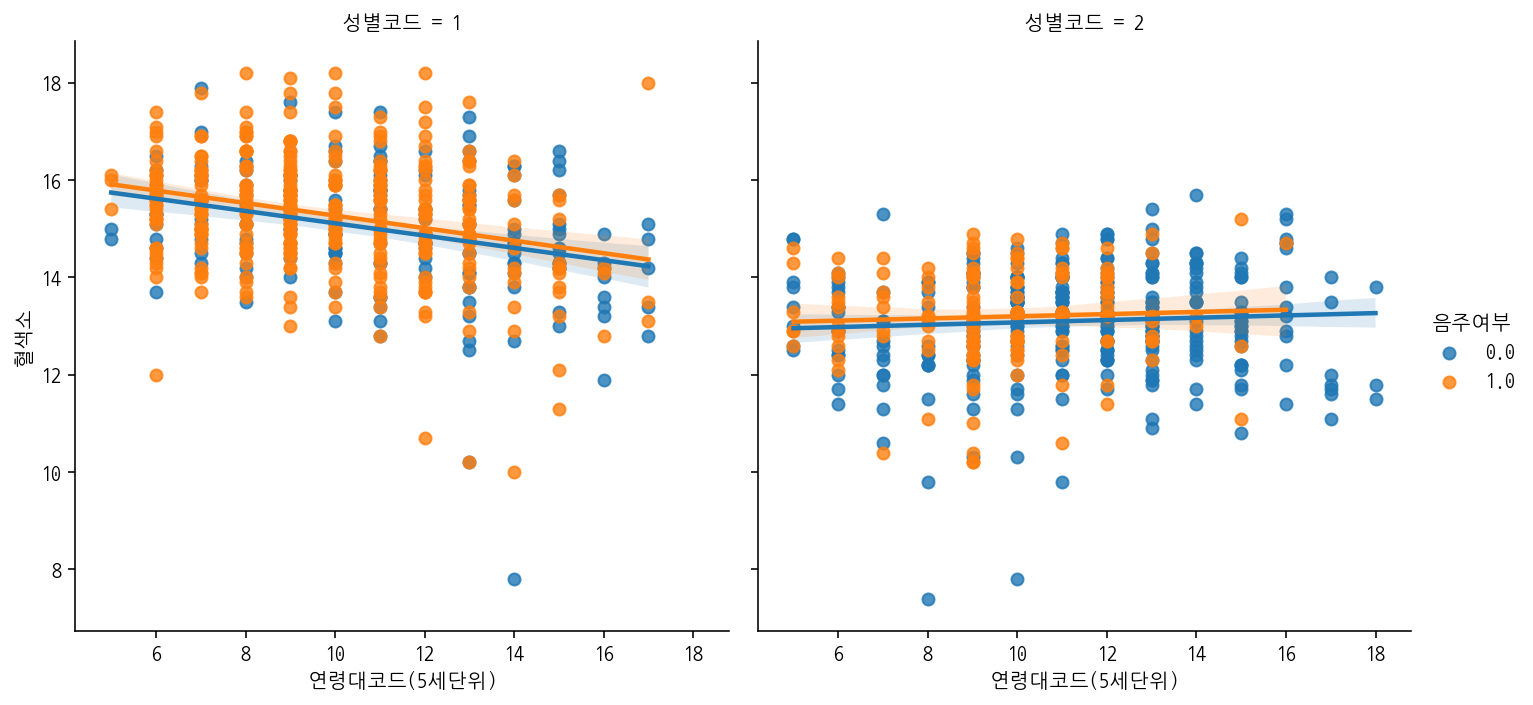

In [49]:
sns.lmplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", col = "성별코드")

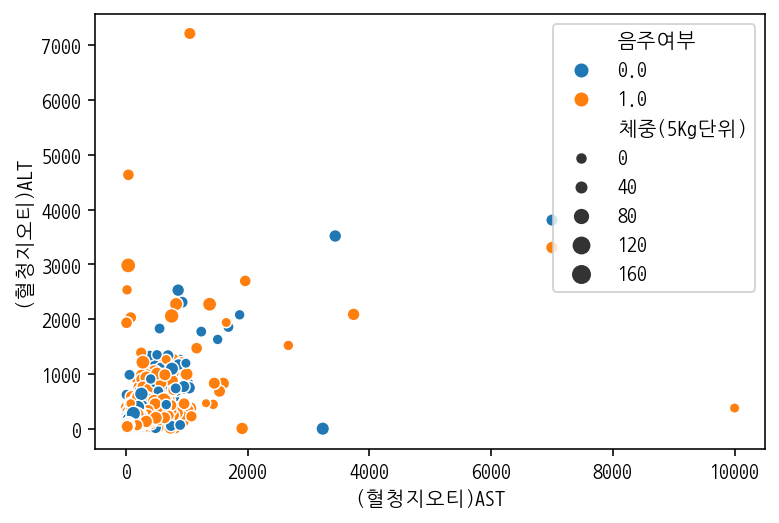

In [55]:
sns.scatterplot(data = df, x = "(혈청지오티)AST", y = "(혈청지오티)ALT", hue = "음주여부", size = "체중(5Kg단위)")

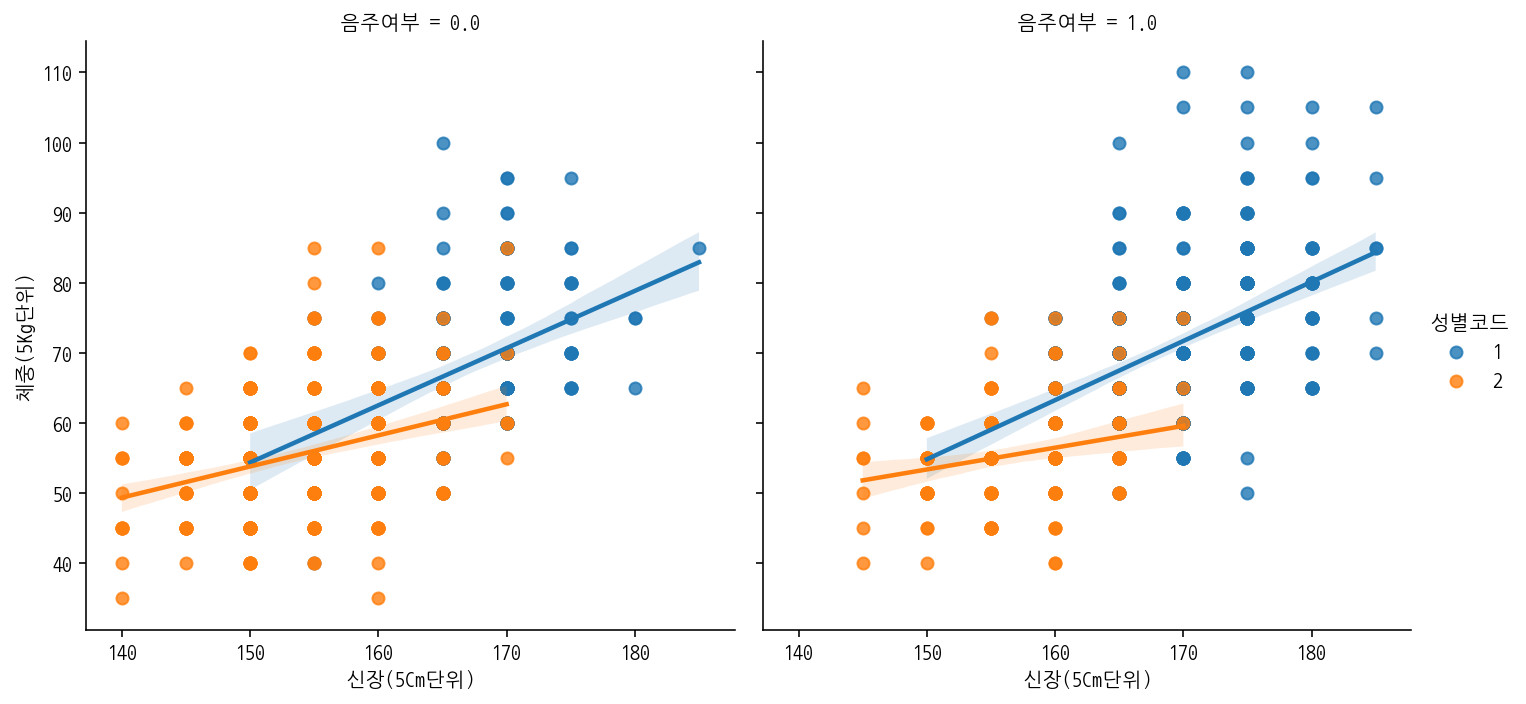

In [63]:
sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "성별코드", col = "음주여부")

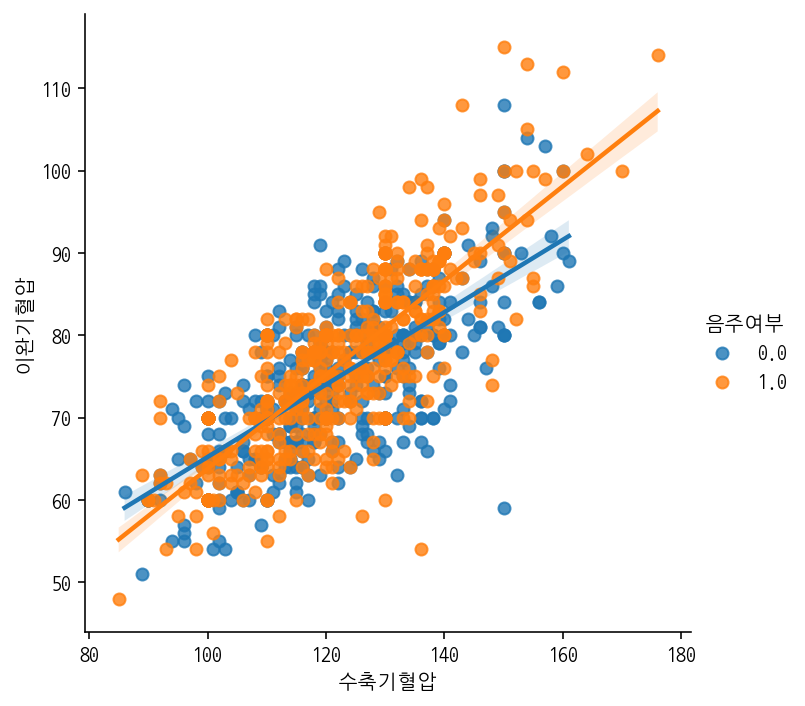

In [65]:
sns.lmplot(data = df_sample, x = "수축기혈압", y = "이완기혈압", hue = "음주여부")

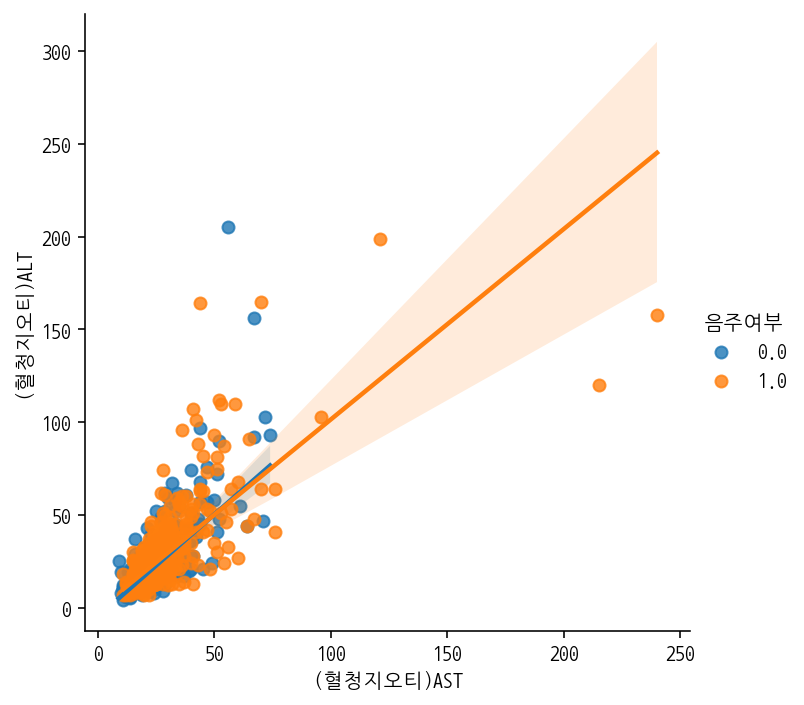

In [69]:
sns.lmplot(data = df_sample, x = "(혈청지오티)AST", y = "(혈청지오티)ALT", hue = "음주여부", robust = True)

# 이상치다루기

In [72]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

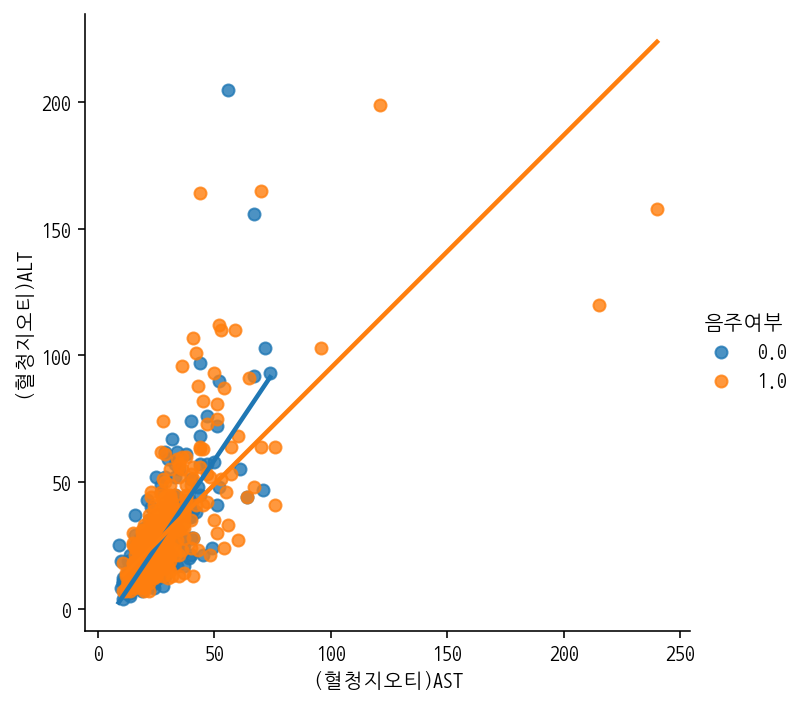

In [74]:
sns.lmplot(data = df_ASLT, x = "(혈청지오티)AST", y = "(혈청지오티)ALT", hue = "음주여부", ci = None)

In [83]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
4754,2017,4755,1,9,41,170,55,74.0,1.0,0.7,...,125.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
15820,2017,15821,2,13,45,150,55,83.0,0.6,1.2,...,999.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
17830,2017,17831,2,8,41,150,50,64.6,1.2,1.2,...,111.0,3.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
19949,2017,19950,1,6,41,170,105,103.0,1.0,1.2,...,133.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
26464,2017,26465,1,7,41,175,70,82.0,1.2,1.2,...,169.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982305,2017,982306,2,16,28,155,50,79.3,0.4,0.7,...,71.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
990867,2017,990868,2,11,41,145,45,75.0,0.9,1.2,...,279.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
991226,2017,991227,1,6,42,170,80,81.0,0.7,0.8,...,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
992747,2017,992748,2,10,41,165,40,58.0,0.9,0.7,...,777.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


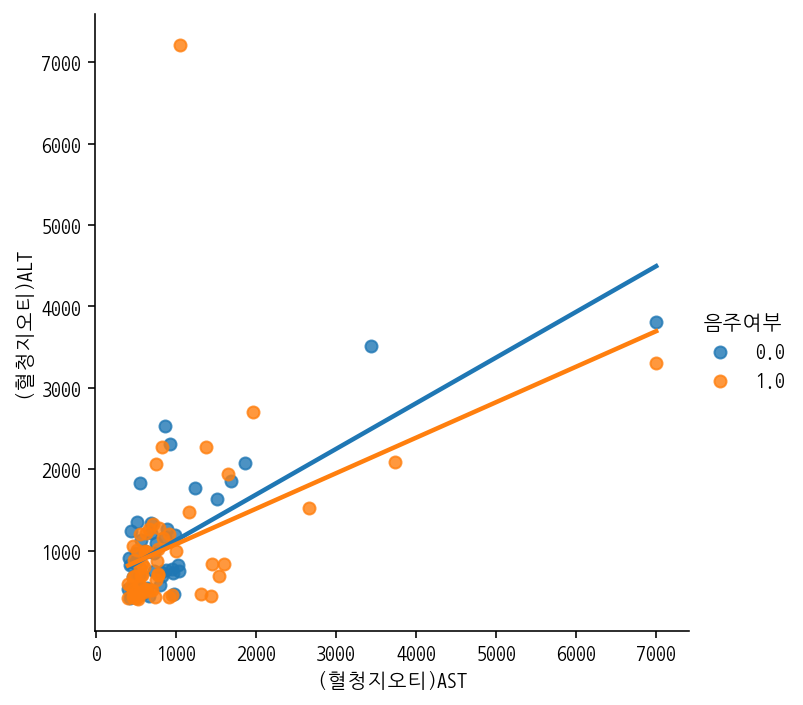

In [82]:
sns.lmplot(data = df_ASLT_high, x = "(혈청지오티)AST", y = "(혈청지오티)ALT", hue = "음주여부", ci = None)

In [87]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
541757,1.0,1.0,96.0,74.0,93.0,161.0,67.0,78.0,69.0,15.4,1.0,1.2,9999.0,380.0,419.0,3.0,1.0


In [88]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [99]:
df_chol = df.loc[df["총콜레스테롤"].notnull(),"총콜레스테롤"]
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

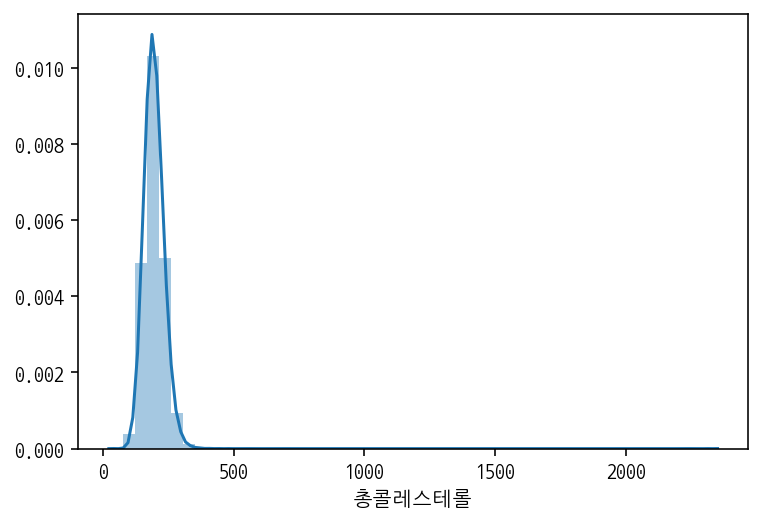

In [108]:
sns.distplot(df_chol)

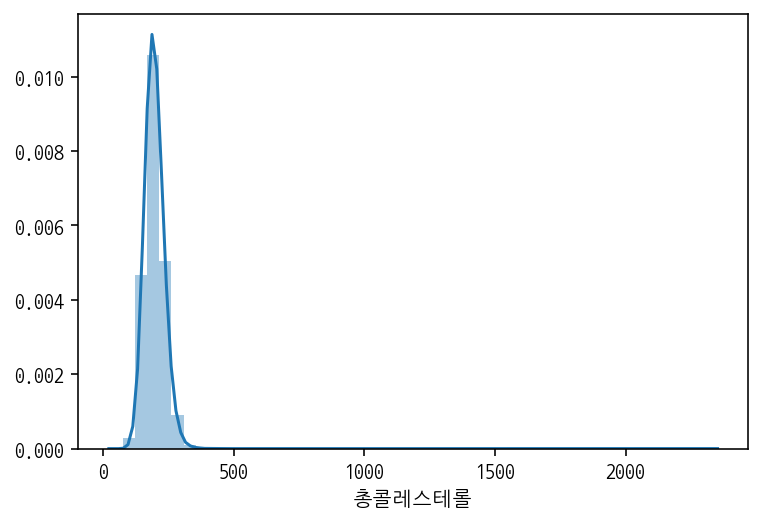

In [109]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), "총콜레스테롤"])

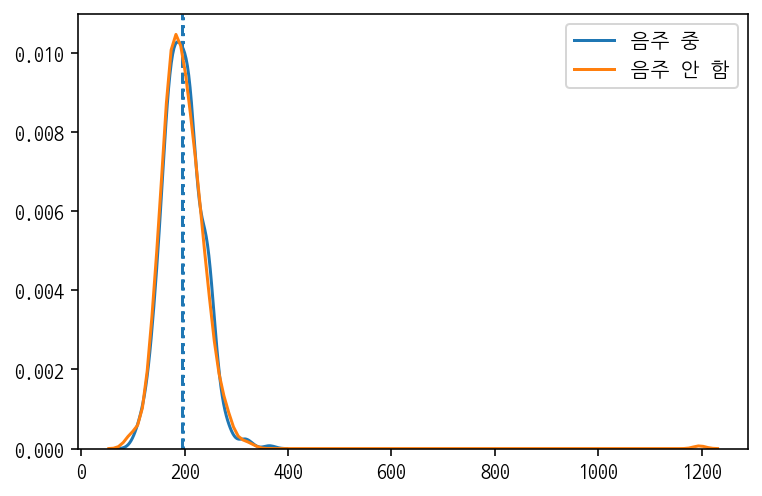

In [120]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df_sample["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df_sample["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

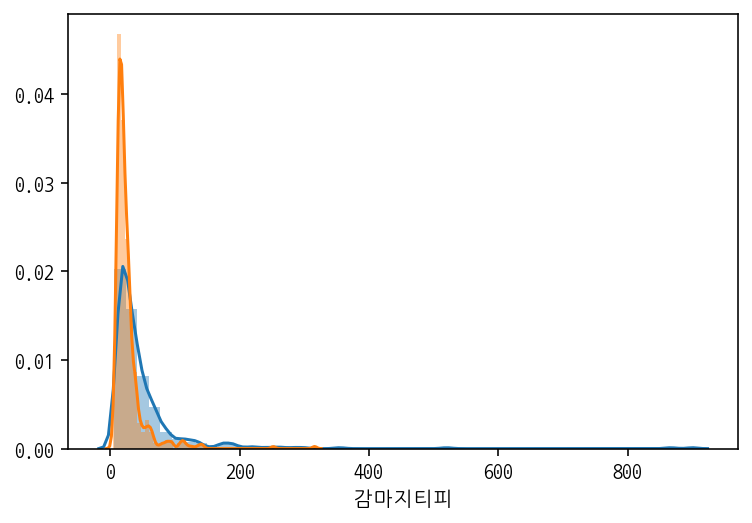

In [123]:
s_1 = df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]

sns.distplot(s_1, label = "음주 중")
sns.distplot(s_0, label = "음주 안 함")

# 상관분석

In [127]:
columns = ['연령대코드(5세단위)','체중(5Kg단위)','신장(5Cm단위)',
                 '허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)',
                 '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                 '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                 'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                 '(혈청지오티)ALT','(혈청지오티)AST','감마지티피','흡연상태','음주여부']

In [134]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_small.corr()

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)ALT,(혈청지오티)AST,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.200336,-0.380239,0.159797,-0.217613,-0.308829,0.233960,0.264549,0.222408,0.091006,...,-0.095972,0.008560,-0.178977,0.058702,0.044958,-0.009871,0.129357,-0.015357,-0.121132,-0.275285
체중(5Kg단위),-0.200336,1.000000,0.665067,0.785950,0.122194,0.168929,-0.043727,-0.047717,0.288983,0.324783,...,-0.330577,0.043839,0.540191,0.012154,0.170468,0.401756,0.193976,0.246924,0.392874,0.290207
신장(5Cm단위),-0.380239,0.665067,1.000000,0.312230,0.202426,0.236260,-0.064044,-0.074738,0.063929,0.157810,...,-0.207537,0.008146,0.541155,-0.007699,0.212811,0.159199,0.055783,0.185091,0.512294,0.410946
허리둘레,0.159797,0.785950,0.312230,1.000000,0.017355,0.030809,0.050644,0.073086,0.349219,0.329256,...,-0.311478,0.017287,0.377673,0.045948,0.131421,0.407063,0.253549,0.234831,0.246296,0.134891
시력(좌),-0.217613,0.122194,0.202426,0.017355,1.000000,0.346265,-0.039499,-0.081000,-0.012888,0.027854,...,-0.045579,-0.052768,0.142582,-0.024741,0.022175,0.080793,0.011212,0.111903,0.141441,0.081130
시력(우),-0.308829,0.168929,0.236260,0.030809,0.346265,1.000000,-0.072118,-0.102880,-0.036395,0.001282,...,-0.068572,0.003336,0.190303,-0.024977,0.080797,0.123455,0.003236,0.035304,0.089486,0.158678
청력(좌),0.233960,-0.043727,-0.064044,0.050644,-0.039499,-0.072118,1.000000,0.565295,0.039115,-0.015526,...,-0.047898,0.006018,-0.000433,0.041231,0.016792,0.044048,0.020671,-0.025004,0.007413,-0.053293
청력(우),0.264549,-0.047717,-0.074738,0.073086,-0.081000,-0.102880,0.565295,1.000000,0.056661,-0.005658,...,-0.069527,-0.032362,-0.050208,0.081749,0.017758,-0.019893,-0.004681,-0.024936,-0.042159,-0.072404
수축기혈압,0.222408,0.288983,0.063929,0.349219,-0.012888,-0.036395,0.039115,0.056661,1.000000,0.751731,...,-0.093036,-0.007070,0.169241,0.043110,0.034018,0.163762,0.133472,0.191333,0.094145,0.042372
이완기혈압,0.091006,0.324783,0.157810,0.329256,0.027854,0.001282,-0.015526,-0.005658,0.751731,1.000000,...,-0.091701,0.038887,0.255690,0.035826,0.081965,0.191155,0.131482,0.200150,0.144974,0.108679


In [144]:
df_corr.loc[df_corr["음주여부"].sort_values() > 0.25, "음주여부"]

체중(5Kg단위)    0.290207
신장(5Cm단위)    0.410946
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [147]:
df_corr["혈색소"].sort_values(ascending = False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [148]:
df_corr["감마지티피"].sort_values(ascending = False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

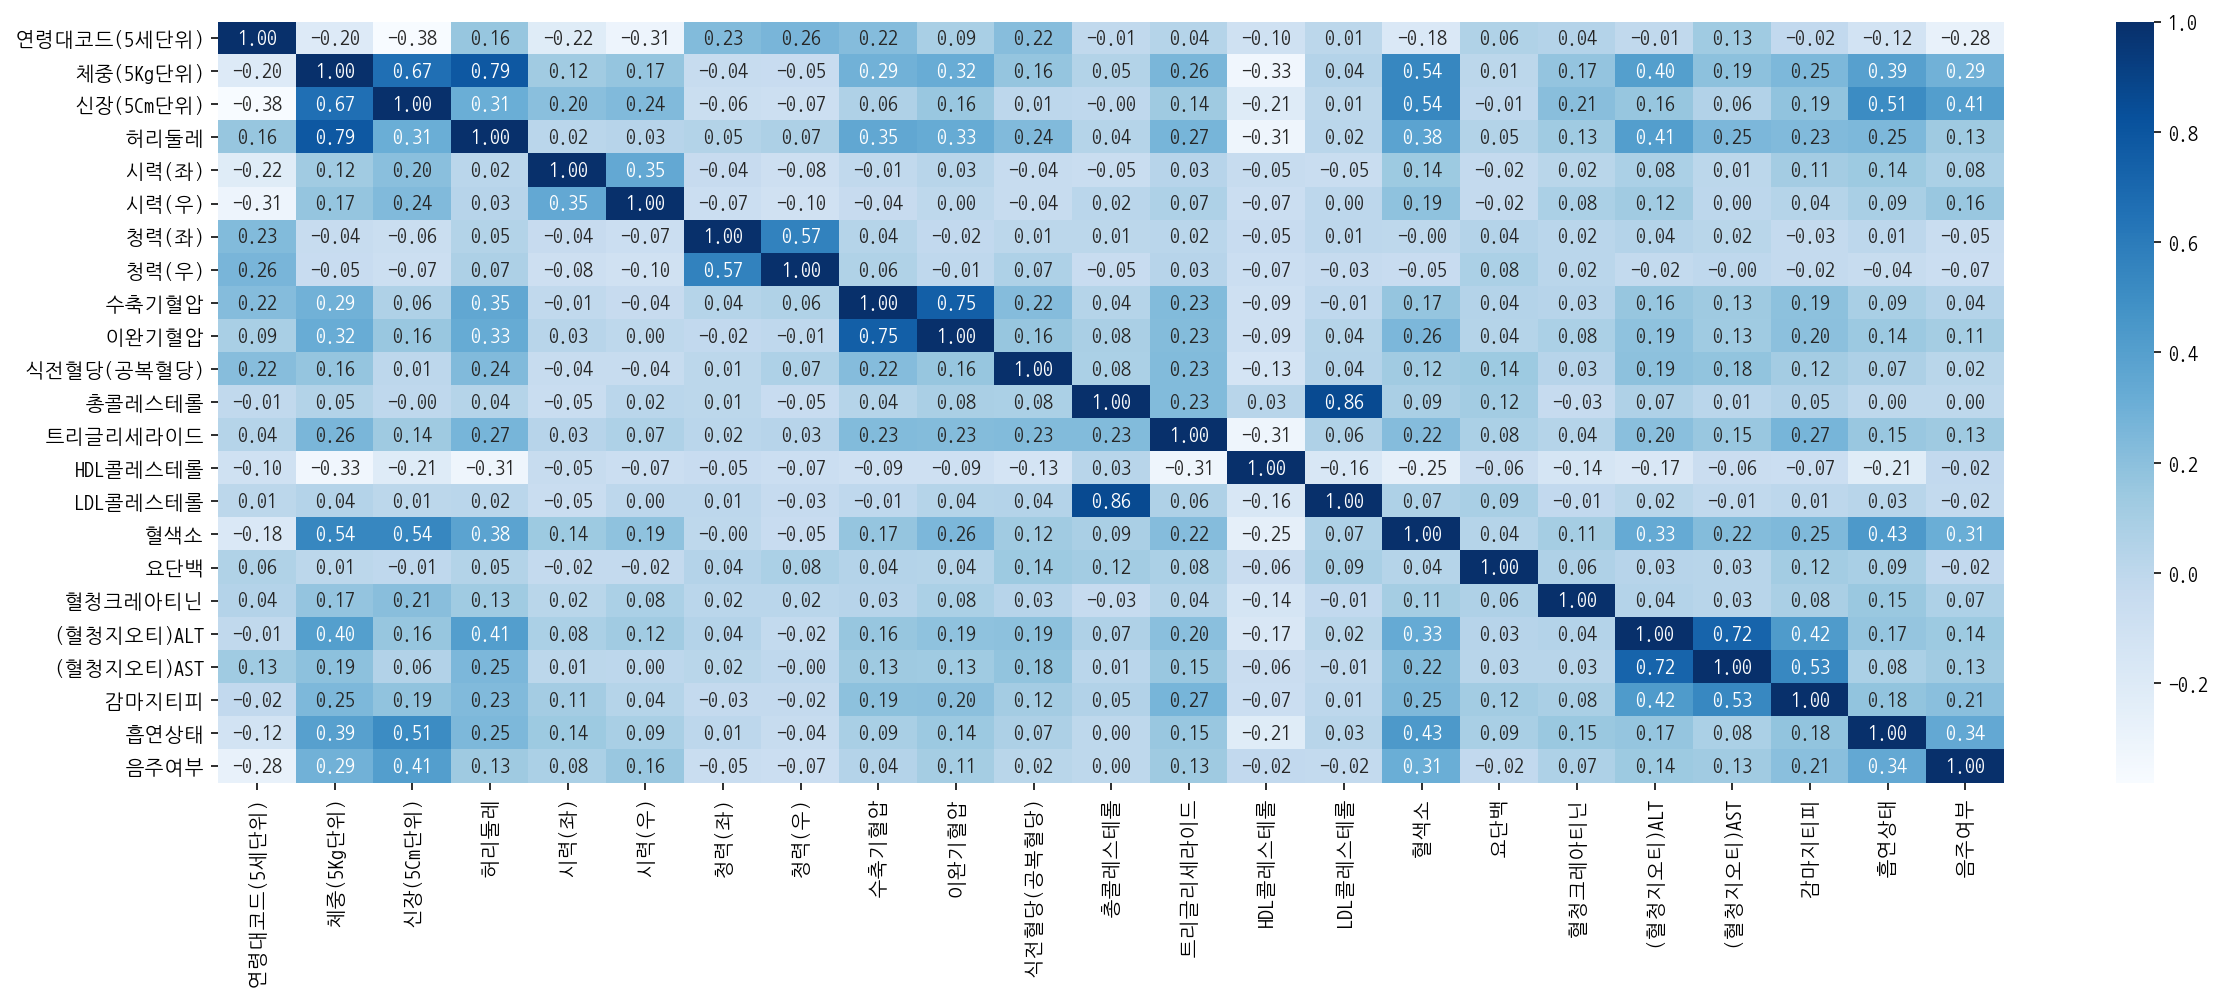

In [154]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap = "Blues")

In [157]:
mask = np.triu(np.ones_like(df_corr, dtype = np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

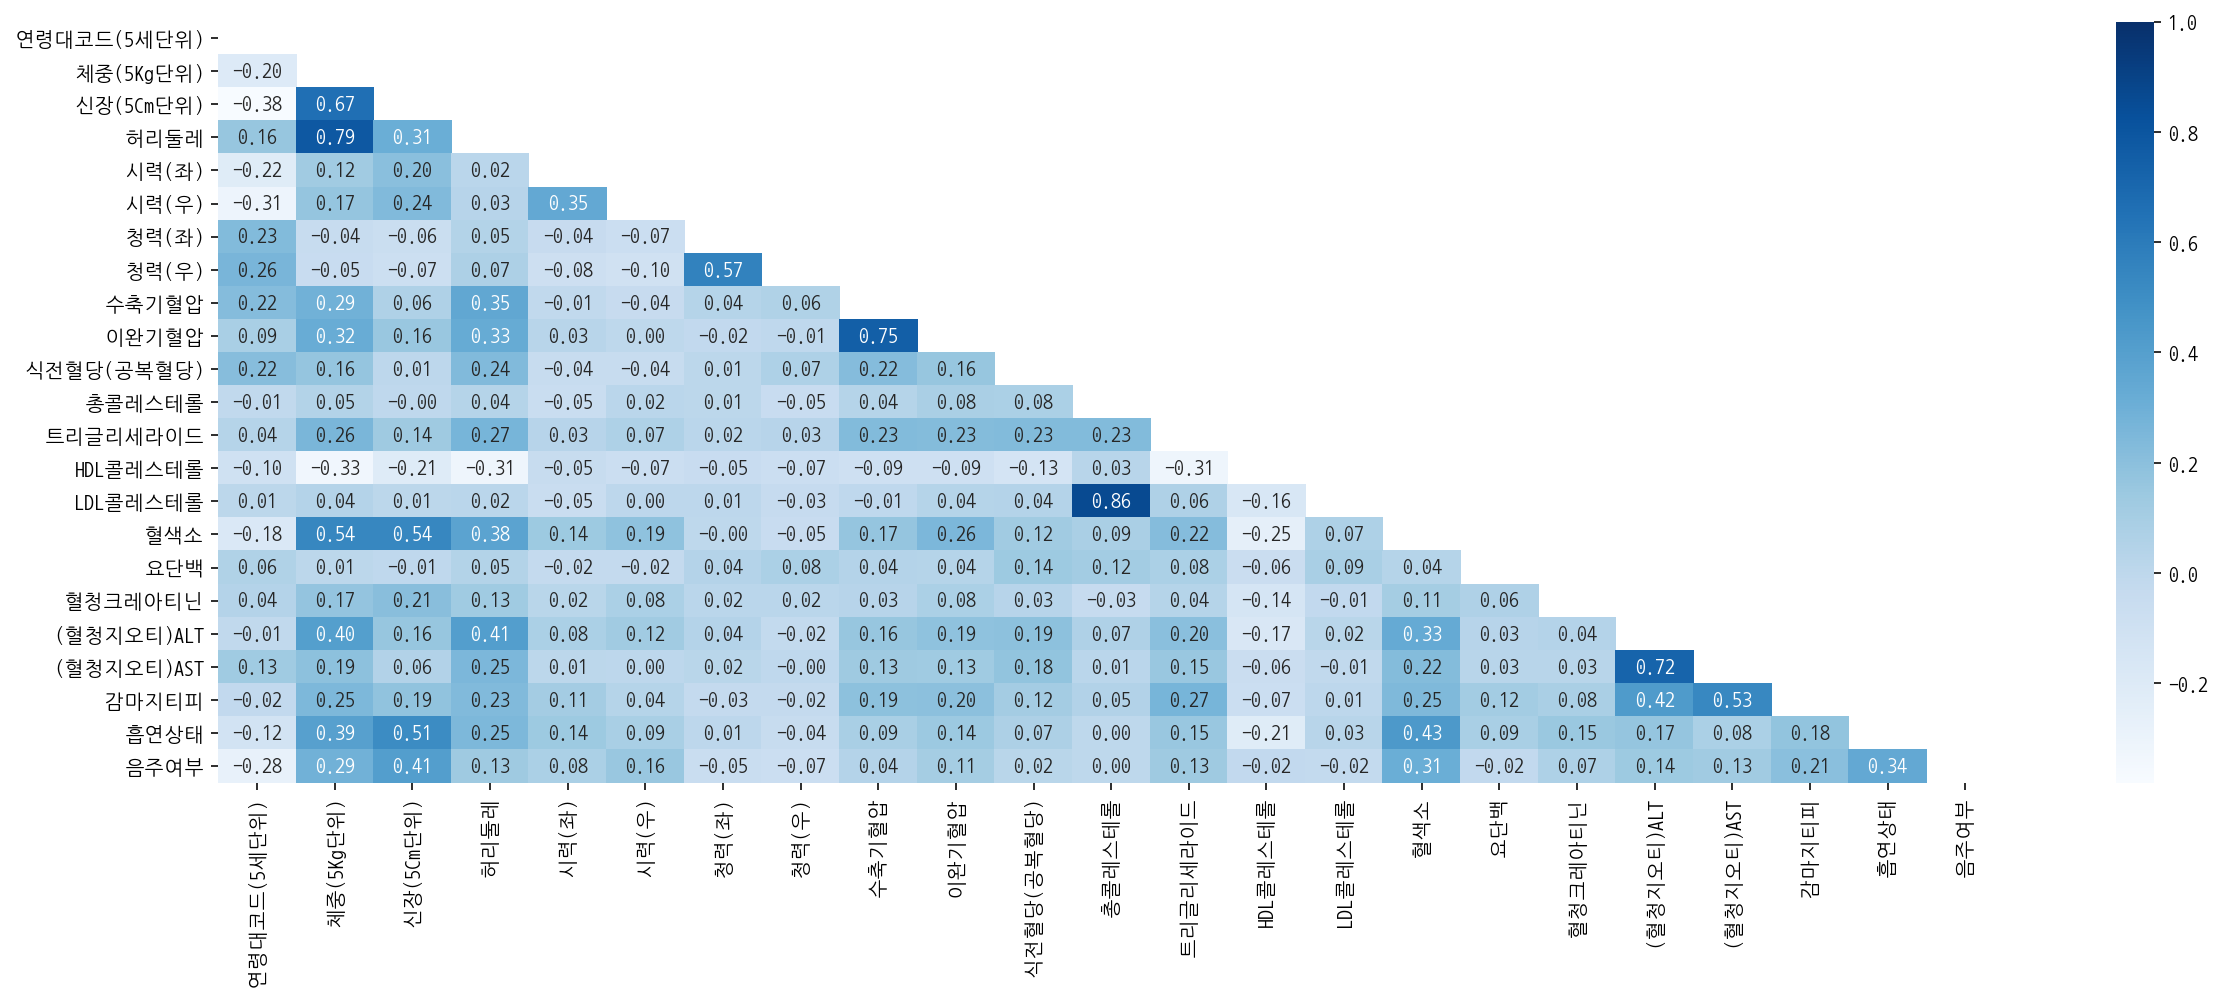

In [158]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap = "Blues", mask = mask)